## 📈 **Dataset & Setup: Apple, Google, Microsoft & NVIDIA Stock Prices**



This project focuses on predicting stock price movements using historical financial data and machine learning models. It leverages features such as closing prices, trading volume, and moving averages to forecast market trends and classify stock direction (up or down). The analysis includes data preprocessing, feature engineering, model training, and performance evaluation using metrics like accuracy and direction prediction rate. The goal is to build an interpretable and reliable model that aids in data-driven investment decision-making.


### ***Loading Datasets***

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
#from pmdarima import auto_arima

In [2]:
# Define the tickers and date range
TICKERS = ["AAPL", "GOOGL", "NVDA", "MSFT"]
start_date = "2020-10-01"
end_date = "2025-10-01" # Up to the start of the current month

# Download data for all tickers
df_multi = yf.download(TICKERS, start=start_date, end=end_date)

df_multi.head()

C:\Users\damie\AppData\Local\Temp\ipykernel_21892\4055081183.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_multi = yf.download(TICKERS, start=start_date, end=end_date)
[*********************100%***********************]  4 of 4 completed


Price            Close                                          High  \
Ticker            AAPL      GOOGL        MSFT       NVDA        AAPL   
Date                                                                   
2020-10-01  113.603714  73.885399  203.712051  13.573068  114.508342   
2020-10-02  109.936562  72.281471  197.700211  13.022497  112.222454   
2020-10-05  113.321609  73.633644  201.717667  13.600984  113.467519   
2020-10-06  110.072754  72.054031  197.431747  13.694696  112.951998   
2020-10-07  111.940384  72.457268  201.190323  13.921501  112.397563   

Price                                                Low             \
Ticker          GOOGL        MSFT       NVDA        AAPL      GOOGL   
Date                                                                  
2020-10-01  74.241448  205.179053  13.720866  112.669906  73.334200   
2020-10-02  73.444948  202.302575  13.478355  109.158392  71.871798   
2020-10-05  73.726502  201.746430  13.602728  110.452095  72.504431   
2020-10-06  73.717553  201.525921  14.098963  109.187577  71.755591   
2020-10-07  72.945402  201.458793  14.076279  111.016297  71.170640   

Price                                    Open                         \
Ticker            MSFT       NVDA        AAPL      GOOGL        MSFT   
Date                                                                   
2020-10-01  202.618991  13.419785  114.430523  73.674853  204.699640   
2020-10-02  197.076965  13.011281  109.810111  72.481591  199.435682   
2020-10-05  198.457652  13.182511  110.802274  72.631553  198.687775   
2020-10-06  196.386631  13.623414  112.543451  73.269646  200.221933   
2020-10-07  198.208375  13.821307  111.492935  72.465709  198.534373   

Price                     Volume                                 
Ticker           NVDA       AAPL     GOOGL      MSFT       NVDA  
Date                                                             
2020-10-01  13.716131  116120400  32884000  27158400  525004000  
2020-10-02  13.184752  144712000  31222000  33154800  552496000  
2020-10-05  13.195721  106243800  21602000  21331600  479820000  
2020-10-06  13.787912  161498200  26096000  28554300  784420000  
2020-10-07  13.957143   96849000  36108000  25681100  418084000

In [3]:
df_multi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2020-10-01 to 2025-09-30
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, AAPL)    1255 non-null   float64
 1   (Close, GOOGL)   1255 non-null   float64
 2   (Close, MSFT)    1255 non-null   float64
 3   (Close, NVDA)    1255 non-null   float64
 4   (High, AAPL)     1255 non-null   float64
 5   (High, GOOGL)    1255 non-null   float64
 6   (High, MSFT)     1255 non-null   float64
 7   (High, NVDA)     1255 non-null   float64
 8   (Low, AAPL)      1255 non-null   float64
 9   (Low, GOOGL)     1255 non-null   float64
 10  (Low, MSFT)      1255 non-null   float64
 11  (Low, NVDA)      1255 non-null   float64
 12  (Open, AAPL)     1255 non-null   float64
 13  (Open, GOOGL)    1255 non-null   float64
 14  (Open, MSFT)     1255 non-null   float64
 15  (Open, NVDA)     1255 non-null   float64
 16  (Volume, AAPL)   1255 non-null   int64  
 

In [4]:
df_multi.shape

(1255, 20)

In [5]:
df_multi.describe()

Price         Close                                                High  \
Ticker         AAPL        GOOGL         MSFT         NVDA         AAPL   
count   1255.000000  1255.000000  1255.000000  1255.000000  1255.000000   
mean     171.990403   135.429163   328.316791    58.386238   173.710635   
std       36.669182    33.925090    86.357787    51.469550    36.850519   
min      105.802513    72.054031   193.999191    11.213529   107.660408   
25%      143.088570   109.135773   251.970802    17.570789   144.665446   
50%      168.815552   133.930786   313.123871    29.355772   170.361315   
75%      197.336967   160.355652   407.525589   107.758133   199.507581   
max      258.103729   254.720001   534.760925   186.580002   259.179926   

Price                                                  Low               \
Ticker        GOOGL         MSFT         NVDA         AAPL        GOOGL   
count   1255.000000  1255.000000  1255.000000  1255.000000  1255.000000   
mean     136.911230   331.284049    59.391506   170.090435   133.879507   
std       34.179664    86.713164    52.244188    36.374852    33.589358   
min       72.945402   195.878416    11.720917   104.392075    71.170640   
25%      110.673173   254.473862    17.898798   141.423890   107.230422   
50%      135.310758   316.090330    30.237118   167.354757   132.406299   
75%      162.428700   411.053463   110.271120   194.857678   158.209221   
max      256.000000   554.538376   187.350006   256.718662   251.809998   

Price                                    Open                            \
Ticker         MSFT         NVDA         AAPL        GOOGL         MSFT   
count   1255.000000  1255.000000  1255.000000  1255.000000  1255.000000   
mean     325.074102    57.248710   171.816673   135.343107   328.233691   
std       85.954672    50.565941    36.587278    33.904645    86.437995   
min      191.400704    10.800024   106.133241    72.465709   195.120951   
25%      248.379050    17.025157   142.938068   109.036715   251.475622   
50%      310.012169    28.438952   168.579066   133.826976   313.206851   
75%      404.370576   104.074081   197.026392   160.246473   407.246802   
max      531.027040   181.479996   257.276679   254.429993   554.318706   

Price                      Volume                                            
Ticker         NVDA          AAPL         GOOGL          MSFT          NVDA  
count   1255.000000  1.255000e+03  1.255000e+03  1.255000e+03  1.255000e+03  
mean      58.368928  7.335389e+07  3.220255e+07  2.581843e+07  4.019832e+08  
std       51.473763  3.193290e+07  1.373693e+07  1.005787e+07  1.796261e+08  
min       10.957835  2.323470e+07  9.312000e+06  7.164500e+06  9.788400e+07  
25%       17.478368  5.022195e+07  2.336450e+07  1.918860e+07  2.549678e+08  
50%       29.604304  6.621320e+07  2.885080e+07  2.343310e+07  3.859350e+08  
75%      106.901627  8.877760e+07  3.661590e+07  2.975970e+07  5.110130e+08  
max      182.949688  3.186799e+08  1.274901e+08  9.042890e+07  1.543911e+09

In [6]:
# Create separate DataFrames for each stock

df_google = df_multi.xs('GOOGL', axis=1, level=1)
df_nvidia = df_multi.xs('NVDA', axis=1, level=1)
df_microsoft = df_multi.xs('MSFT', axis=1, level=1)
df_apple = df_multi.xs('AAPL', axis=1, level=1)


df_google.head()


Price           Close       High        Low       Open    Volume
Date                                                            
2020-10-01  73.885399  74.241448  73.334200  73.674853  32884000
2020-10-02  72.281471  73.444948  71.871798  72.481591  31222000
2020-10-05  73.633644  73.726502  72.504431  72.631553  21602000
2020-10-06  72.054031  73.717553  71.755591  73.269646  26096000
2020-10-07  72.457268  72.945402  71.170640  72.465709  36108000

In [7]:
df_nvidia.head()

Price           Close       High        Low       Open     Volume
Date                                                             
2020-10-01  13.573068  13.720866  13.419785  13.716131  525004000
2020-10-02  13.022497  13.478355  13.011281  13.184752  552496000
2020-10-05  13.600984  13.602728  13.182511  13.195721  479820000
2020-10-06  13.694696  14.098963  13.623414  13.787912  784420000
2020-10-07  13.921501  14.076279  13.821307  13.957143  418084000

In [8]:
df_microsoft.head()

Price            Close        High         Low        Open    Volume
Date                                                                
2020-10-01  203.712051  205.179053  202.618991  204.699640  27158400
2020-10-02  197.700211  202.302575  197.076965  199.435682  33154800
2020-10-05  201.717667  201.746430  198.457652  198.687775  21331600
2020-10-06  197.431747  201.525921  196.386631  200.221933  28554300
2020-10-07  201.190323  201.458793  198.208375  198.534373  25681100

In [9]:
df_apple.head()

Price            Close        High         Low        Open     Volume
Date                                                                 
2020-10-01  113.603714  114.508342  112.669906  114.430523  116120400
2020-10-02  109.936562  112.222454  109.158392  109.810111  144712000
2020-10-05  113.321609  113.467519  110.452095  110.802274  106243800
2020-10-06  110.072754  112.951998  109.187577  112.543451  161498200
2020-10-07  111.940384  112.397563  111.016297  111.492935   96849000

### ***Cleaning Data***

In [10]:
#checking for null values
df_multi.isnull().sum()

Price   Ticker
Close   AAPL      0
        GOOGL     0
        MSFT      0
        NVDA      0
High    AAPL      0
        GOOGL     0
        MSFT      0
        NVDA      0
Low     AAPL      0
        GOOGL     0
        MSFT      0
        NVDA      0
Open    AAPL      0
        GOOGL     0
        MSFT      0
        NVDA      0
Volume  AAPL      0
        GOOGL     0
        MSFT      0
        NVDA      0
dtype: int64

#### ***Exploratory Data Analysis***

#### **1. Based on Stock Price**

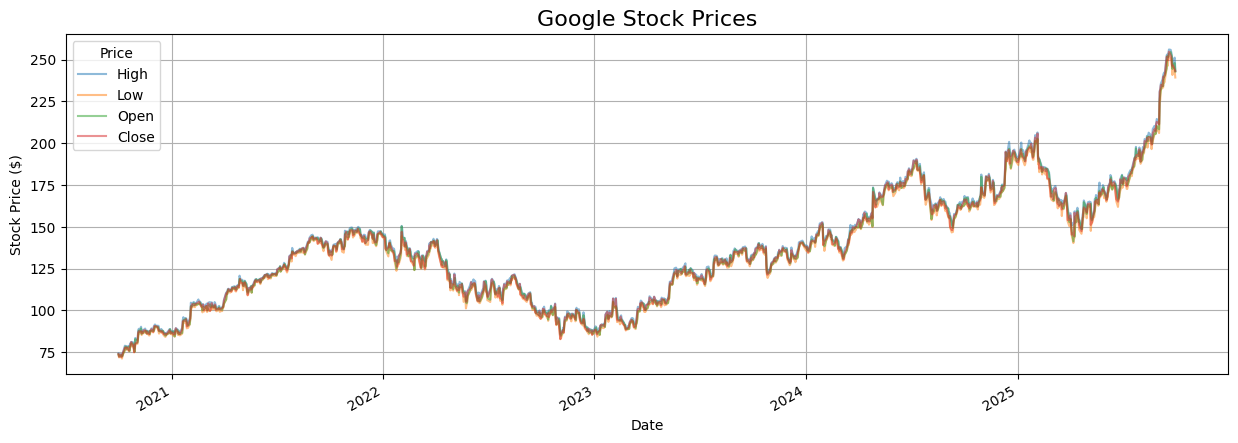

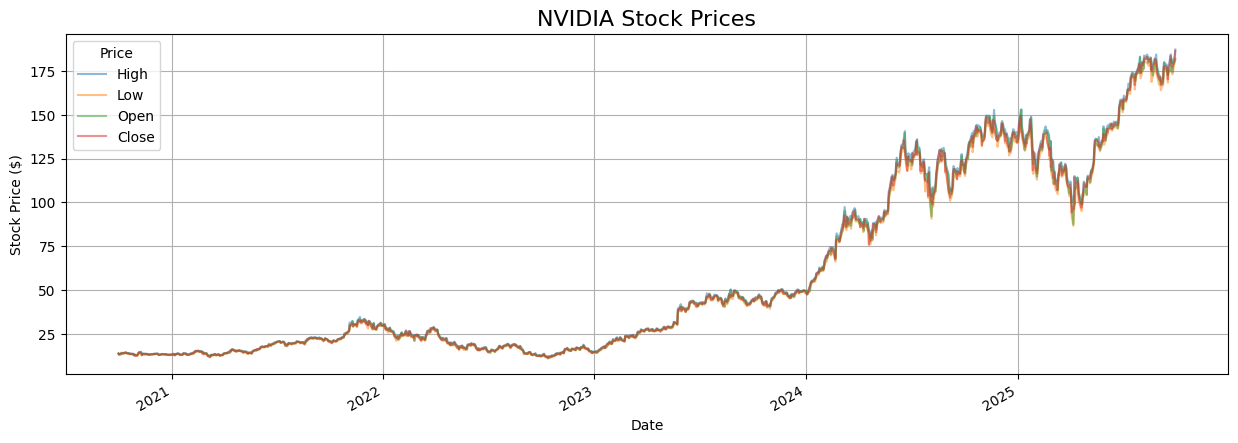

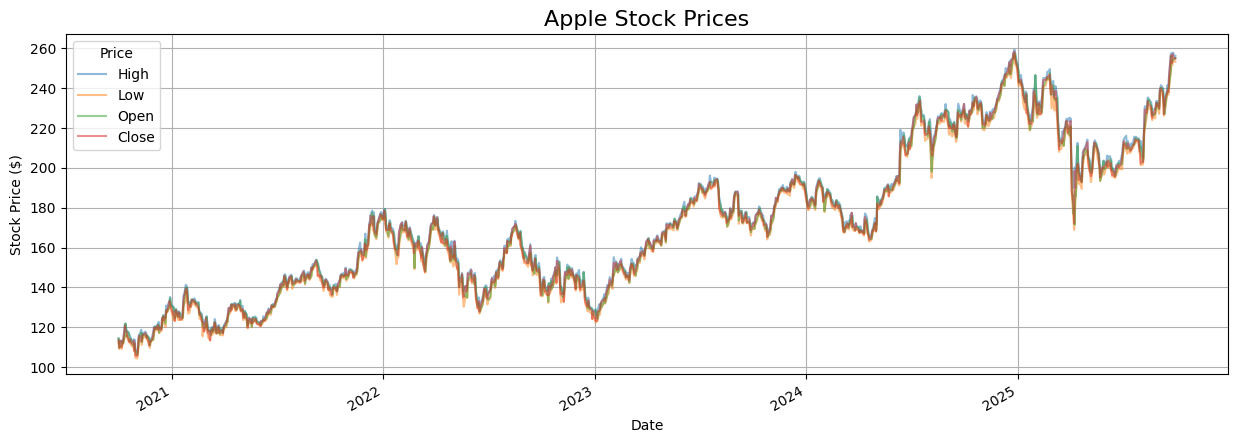

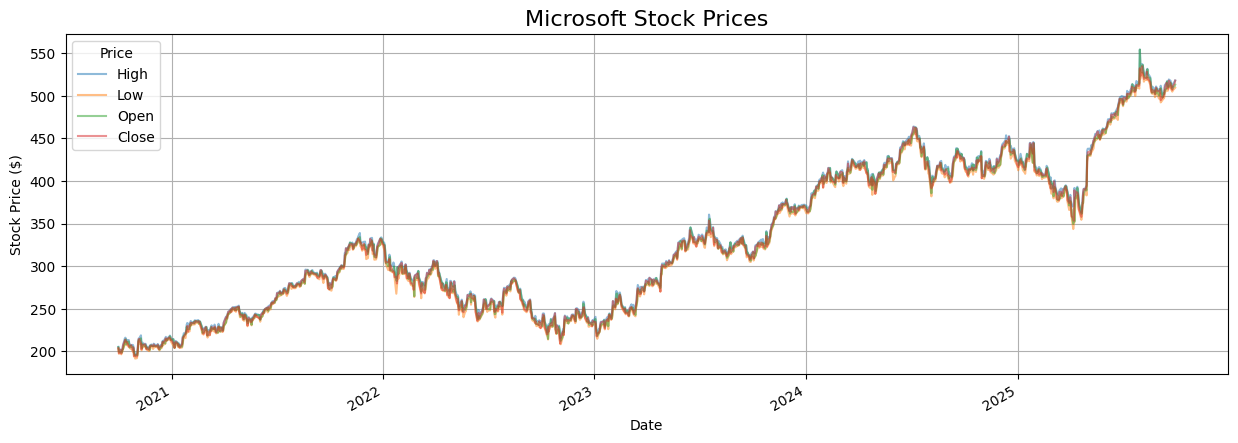

In [11]:
# Google Stock Prices
df_google[['High','Low','Open','Close']].plot(figsize = (15, 5), alpha = 0.5)
plt.title('Google Stock Prices', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.grid(True)
plt.show()

# Nvidia Stock Prices
df_nvidia[['High','Low','Open','Close']].plot(figsize = (15, 5), alpha = 0.5)
plt.title('NVIDIA Stock Prices', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.grid(True)
plt.show()

# Apple Stock Prices
df_apple[['High','Low','Open','Close']].plot(figsize = (15, 5), alpha = 0.5)
plt.title('Apple Stock Prices', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.grid(True)
plt.show()

# Microsoft Stock Prices
df_microsoft[['High','Low','Open','Close']].plot(figsize = (15, 5), alpha = 0.5)
plt.title('Microsoft Stock Prices', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.grid(True)
plt.show()




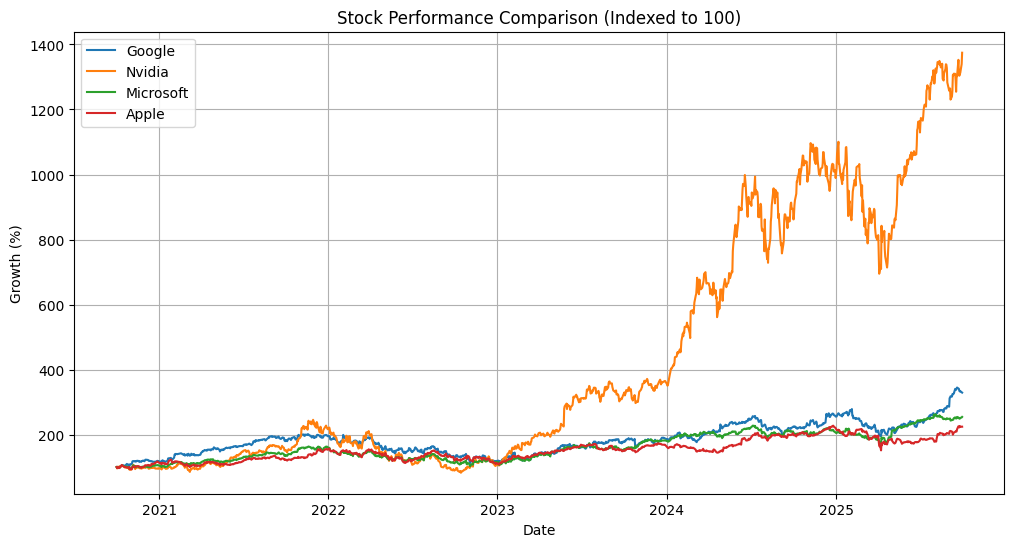

In [12]:
# Plot all stock prices on one chart (requires normalization for comparison)
plt.figure(figsize=(12, 6))

plt.plot(df_google['Close'] / df_google['Close'].iloc[0] * 100, label='Google')
plt.plot(df_nvidia['Close'] / df_nvidia['Close'].iloc[0] * 100, label='Nvidia')
plt.plot(df_microsoft['Close'] / df_microsoft['Close'].iloc[0] * 100, label='Microsoft')
plt.plot(df_apple['Close'] / df_apple['Close'].iloc[0] * 100, label='Apple')

plt.title('Stock Performance Comparison (Indexed to 100)')
plt.xlabel('Date')
plt.ylabel('Growth (%)')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# Interactive plot using Plotly

import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Add each company’s normalized Close price
fig.add_trace(go.Scatter(
    x=df_google.index,
    y=df_google['Close'] / df_google['Close'].iloc[0] * 100,
    mode='lines',
    name='Google (GOOG)'
))

fig.add_trace(go.Scatter(
    x=df_nvidia.index,
    y=df_nvidia['Close'] / df_nvidia['Close'].iloc[0] * 100,
    mode='lines',
    name='Nvidia (NVDA)'
))

fig.add_trace(go.Scatter(
    x=df_microsoft.index,
    y=df_microsoft['Close'] / df_microsoft['Close'].iloc[0] * 100,
    mode='lines',
    name='Microsoft (MSFT)'
))

fig.add_trace(go.Scatter(
    x=df_apple.index,
    y=df_apple['Close'] / df_apple['Close'].iloc[0] * 100,
    mode='lines',
    name='Apple (AAPL)'
))

# Customize layout
fig.update_layout(
    title="📈 Stock Performance Comparison (Indexed to 100)",
    xaxis_title="Date",
    yaxis_title="Growth (%)",
    template="plotly_dark",      # dark theme
    hovermode="x unified",       # single hover label across all lines
    legend=dict(title="Companies")
)

# Show interactive chart
fig.show()


#### **2. Based on Stock Volume**

In [14]:

import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Add volume lines for each company
fig.add_trace(go.Scatter(
    x=df_google.index,
    y=df_google['Volume'],
    mode='lines',
    name='Google (GOOG)'
))

fig.add_trace(go.Scatter(
    x=df_nvidia.index,
    y=df_nvidia['Volume'],
    mode='lines',
    name='Nvidia (NVDA)'
))

fig.add_trace(go.Scatter(
    x=df_microsoft.index,
    y=df_microsoft['Volume'],
    mode='lines',
    name='Microsoft (MSFT)'
))

fig.add_trace(go.Scatter(
    x=df_apple.index,
    y=df_apple['Volume'],
    mode='lines',
    name='Apple (AAPL)'
))

# Customize layout
fig.update_layout(
    title="📊 Trading Volume Comparison (Google, Nvidia, Microsoft, Apple)",
    xaxis_title="Date",
    yaxis_title="Volume (Shares Traded)",
    template="plotly_dark",
    hovermode="x unified",
    legend=dict(title="Companies")
)

# Show interactive chart
fig.show()


### ***Technical Indicators***

#### **1. Trend Indicators (Direction)**

**a) Simple Moving Average (SMA)**

The Simple Moving Average (SMA) helps smooth out short-term price fluctuations and highlight longer-term trends in stock movements. By averaging the closing prices over a chosen window (e.g., 20 or 50 days), it allows analysts to easily identify whether a stock like Apple or Microsoft is generally trending upward or downward. For our four companies, the SMA helps confirm momentum consistency in tech-sector trends and signals potential support or resistance levels.

In [16]:
# Simple Moving Average (SMA)

# --- Company dataframes in a dictionary ---
companies = {
    "Google": df_google,
    "Microsoft": df_microsoft,
    "Apple": df_apple,
    "Nvidia": df_nvidia
}

# --- Compute 20-day SMA for all companies using pandas rolling (no external dependency) ---
for name, df in companies.items():
    # use rolling mean for a 20-day SMA; min_periods=20 will produce NaN for the first 19 rows
    df["SMA_20"] = df["Close"].rolling(window=20, min_periods=20).mean()

# --- Create figure and add traces dynamically ---
fig = go.Figure()
for i, (name, df) in enumerate(companies.items()):
    visible = True if i == 0 else False  # only first visible initially
    fig.add_trace(go.Scatter(
        x=df.index, y=df["Close"],
        mode="lines",
        name=f"{name} Close",
        line=dict(color="#1E90FF", width=2),
        visible=visible
    ))
    fig.add_trace(go.Scatter(
        x=df.index, y=df["SMA_20"],
        mode="lines",
        name=f"{name} 20-Day SMA",
        line=dict(color="#FFD700", width=2, dash="dot"),
        visible=visible
    ))

# --- Dropdown buttons (auto-generated) ---
buttons = []
n_companies = len(companies)
for i, name in enumerate(companies.keys()):
    visible = [False] * (2 * n_companies)
    visible[i*2 : i*2 + 2] = [True, True]
    buttons.append(dict(
        label=name,
        method="update",
        args=[
            {"visible": visible},
            {"title": f"{name} Stock Price with 20-Day Simple Moving Average"}
        ]
    ))

# --- Layout styling ---
fig.update_layout(
    updatemenus=[dict(
        type="dropdown",
        active=0,
        buttons=buttons,
        x=0.985, xanchor="right",
        y=1.13, yanchor="top",
        bgcolor="#1E1E1E",      # dark background
        bordercolor="#00FFFF",  # cyan border
        borderwidth=1.5,
        font=dict(color="white", size=13),
        direction="down",
        showactive=True         # highlights selected (but not hover white)
    )],
    title="Google Stock Price with 20-Day Simple Moving Average",
    xaxis_title="Date",
    yaxis_title="Stock Price ($)",
    template="plotly_dark",
    plot_bgcolor="#111111",
    paper_bgcolor="#111111",
    legend=dict(
        x=0.01, y=0.99,
        bordercolor="#444",
        borderwidth=1,
        font=dict(size=12)
    ),
    height=600
)

# --- Show chart with default Plotly hover ---
fig.show()


C:\Users\damie\AppData\Local\Temp\ipykernel_21892\2832729604.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\damie\AppData\Local\Temp\ipykernel_21892\2832729604.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\damie\AppData\Local\Temp\ipykernel_21892\2832729604.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

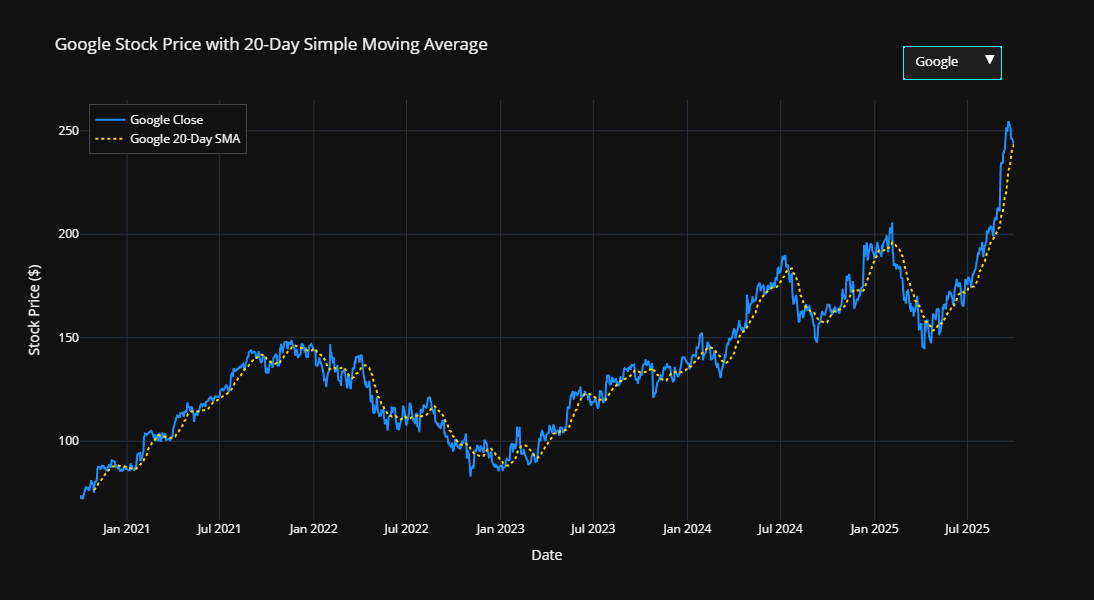

In [22]:
from IPython.display import Image, display

display(Image(filename="plotly_images/SMA.png"))


For google, the stock price experienced a significant long-term upward trajectory, particularly evident after the recovery from the 2022-early 2023 downturn. The SMA consistently acts as a benchmark for the short-term trend: when the price is above the SMA, it signals an upward momentum (e.g., late 2023 to early 2024), and when it is below, it signals a downward or consolidating trend.

The most recent period (mid-2025) shows the price sharply pulling away above the rapidly rising SMA, confirming a period of exceptional short-term bullish strength and acceleration in the price trend.

**b) Exponential Moving Average (EMA)**

The Exponential Moving Average (EMA) assigns more weight to recent prices, making it more responsive to new information than the SMA. It’s especially valuable for detecting early trend changes in volatile stocks like Nvidia and Google. Traders use EMA crossovers (e.g., 12-day vs. 26-day) to identify potential entry or exit points — giving a faster reaction to shifts in market sentiment around these fast-moving tech firms.

In [25]:
# Exponential Moving Average (EMA)
# install ta if missing (use Jupyter magic)
%pip install ta
import ta

# --- Step 1: Company dataframes ---
companies = {
    "Google": df_google,
    "Microsoft": df_microsoft,
    "Apple": df_apple,
    "Nvidia": df_nvidia
}

# --- Step 2: Compute 20-day EMA for all companies ---
for name, df in companies.items():
    df["EMA_20"] = ta.trend.ema_indicator(df["Close"], window=20)

# --- Step 3: Create figure and add traces ---
fig = go.Figure()
for i, (name, df) in enumerate(companies.items()):
    visible = True if i == 0 else False  # show only the first by default
    fig.add_trace(go.Scatter(
        x=df.index, y=df["Close"],
        mode="lines",
        name=f"{name} Close",
        line=dict(color="#1E90FF", width=2),
        visible=visible
    ))
    fig.add_trace(go.Scatter(
        x=df.index, y=df["EMA_20"],
        mode="lines",
        name=f"{name} 20-Day EMA",
        line=dict(color="#C8FF47", width=2, dash="dot"),  # tomato color
        visible=visible
    ))

# --- Step 4: Dropdown filter for companies ---
buttons = []
n_companies = len(companies)
for i, name in enumerate(companies.keys()):
    visible = [False] * (2 * n_companies)
    visible[i*2 : i*2 + 2] = [True, True]
    buttons.append(dict(
        label=name,
        method="update",
        args=[
            {"visible": visible},
            {"title": f"{name} Stock Price with 20-Day Exponential Moving Average"}
        ]
    ))

# --- Step 5: Layout styling ---
fig.update_layout(
    updatemenus=[dict(
        type="dropdown",
        active=0,
        buttons=buttons,
        x=0.985, xanchor="right",
        y=1.13, yanchor="top",
        bgcolor="#1E1E1E",      # dark filter background
        bordercolor="#00FFFF",  # cyan border
        borderwidth=1.5,
        font=dict(color="white", size=13),
        direction="down",
        showactive=True
    )],
    title="Google Stock Price with 20-Day Exponential Moving Average",
    xaxis_title="Date",
    yaxis_title="Stock Price ($)",
    template="plotly_dark",
    plot_bgcolor="#111111",
    paper_bgcolor="#111111",
    legend=dict(
        x=0.01, y=0.99,
        bordercolor="#444",
        borderwidth=1,
        font=dict(size=12)
    ),
    height=600
)

# --- Step 6: Show chart (default hover preserved) ---
fig.show()


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\damie\AppData\Local\Temp\ipykernel_21892\3061894532.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\damie\AppData\Local\Temp\ipykernel_21892\3061894532.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\damie\AppData\Local\Temp\ipykernel_21892\3061894532.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

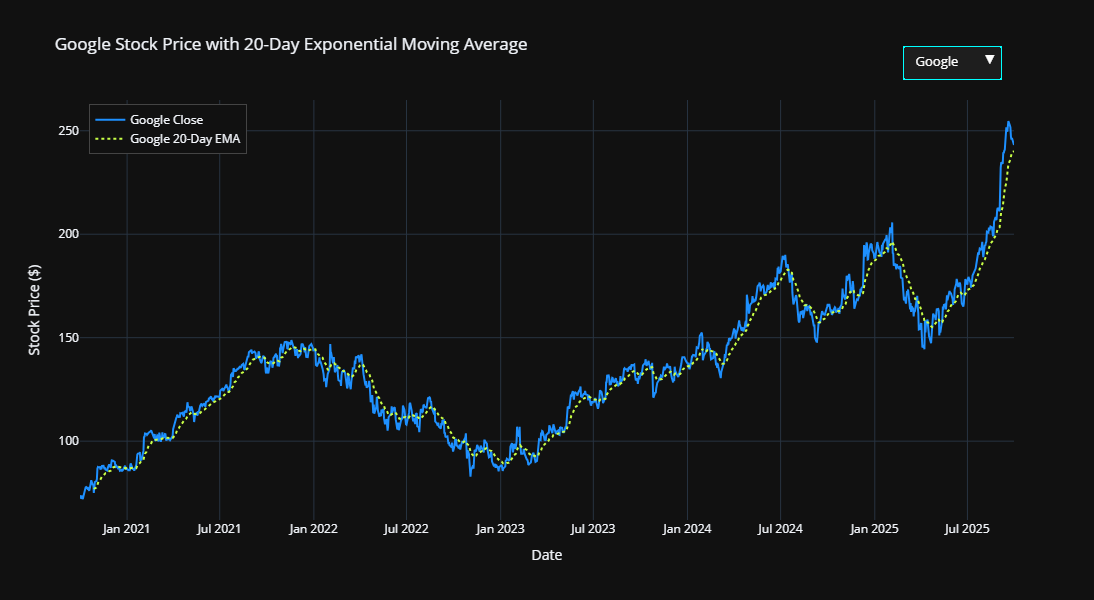

In [26]:
display(Image(filename="plotly_images/EMA.png"))

The 20-Day EMA, which is more sensitive to recent price changes than a simple moving average, acts as a dynamic support and resistance level, closely tracking the short-term trend. 

For google, the overall price trend is significantly upward, especially following the large market rebound that began in early 2023. Throughout the period, the EMA frequently served as a point of support during uptrends (e.g., late 2023) and resistance during downtrends.

A particularly strong breakout is visible in mid-2025, where the price surged sharply above the 20-Day EMA and continued its rapid ascent, confirming a period of intense buying pressure and short-term bullish momentum.

**c) Moving Average Converegence Divergence (MACD)**

The MACD measures the relationship between two EMAs (commonly 12-day and 26-day) to capture momentum changes in price. It’s a key indicator for identifying trend reversals and confirming the strength of a current trend. When applied to Apple, Google, Microsoft, and Nvidia, MACD helps determine when buying or selling pressure is accelerating, offering insights into investor sentiment and possible turning points in stock price momentum.

In [27]:
import plotly.graph_objects as go
import ta

# --- Step 1: Calculate MACD for all 4 companies ---
def add_macd(df):
    df['MACD'] = ta.trend.macd(df['Close'])
    df['MACD_Signal'] = ta.trend.macd_signal(df['Close'])
    df['MACD_Diff'] = ta.trend.macd_diff(df['Close'])
    return df

df_google = add_macd(df_google)
df_microsoft = add_macd(df_microsoft)
df_apple = add_macd(df_apple)
df_nvidia = add_macd(df_nvidia)

# --- Step 2: Create figure ---
fig = go.Figure()

def add_company_traces(df, name, visible=False):
    # MACD Line
    fig.add_trace(go.Scatter(
        x=df.index, y=df['MACD'],
        mode='lines', name=f'{name} MACD',
        line=dict(color='deepskyblue', width=2),
        visible=visible
    ))
    # Signal Line
    fig.add_trace(go.Scatter(
        x=df.index, y=df['MACD_Signal'],
        mode='lines', name=f'{name} Signal',
        line=dict(color='orange', width=2, dash='dot'),
        visible=visible
    ))
    # Histogram (bright red/green)
    fig.add_trace(go.Bar(
        x=df.index, y=df['MACD_Diff'],
        name=f'{name} Histogram',
        marker_color=['#00FF00' if v >= 0 else '#FF0000' for v in df['MACD_Diff']],
        opacity=1,
        visible=visible
    ))

# Add traces
add_company_traces(df_google, "Google", visible=True)
add_company_traces(df_microsoft, "Microsoft")
add_company_traces(df_apple, "Apple")
add_company_traces(df_nvidia, "Nvidia")

# --- Step 3: Dropdown filter (top-right, dark background) ---
companies = ['Google', 'Microsoft', 'Apple', 'Nvidia']
buttons = []

for i, name in enumerate(companies):
    visible = [False] * (3 * len(companies))
    visible[i*3 : i*3 + 3] = [True, True, True]
    buttons.append(dict(
        label=name,
        method='update',
        args=[{'visible': visible},
              {'title': f'{name} - MACD (Moving Average Convergence Divergence)'}]
    ))

# --- Step 4: Update layout ---
fig.update_layout(
    updatemenus=[dict(
        type="dropdown",
        active=0,
        buttons=buttons,
        x=0.98, xanchor="right",  # Position top-right
        y=1.15, yanchor="top",
        bgcolor="#1E1E1E",         # Dark background
        bordercolor="#444",
        font=dict(color="white", size=13)
    )],
    title="Google - MACD (Moving Average Convergence Divergence)",
    xaxis_title="Date",
    yaxis_title="MACD Value",
    template="plotly_dark",
    height=600,
    plot_bgcolor="#111111",
    paper_bgcolor="#111111",
    legend=dict(x=0.01, y=0.99, bordercolor='gray', borderwidth=1, font=dict(size=12))
)

fig.show()


C:\Users\damie\AppData\Local\Temp\ipykernel_21892\2724336738.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\damie\AppData\Local\Temp\ipykernel_21892\2724336738.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\damie\AppData\Local\Temp\ipykernel_21892\2724336738.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

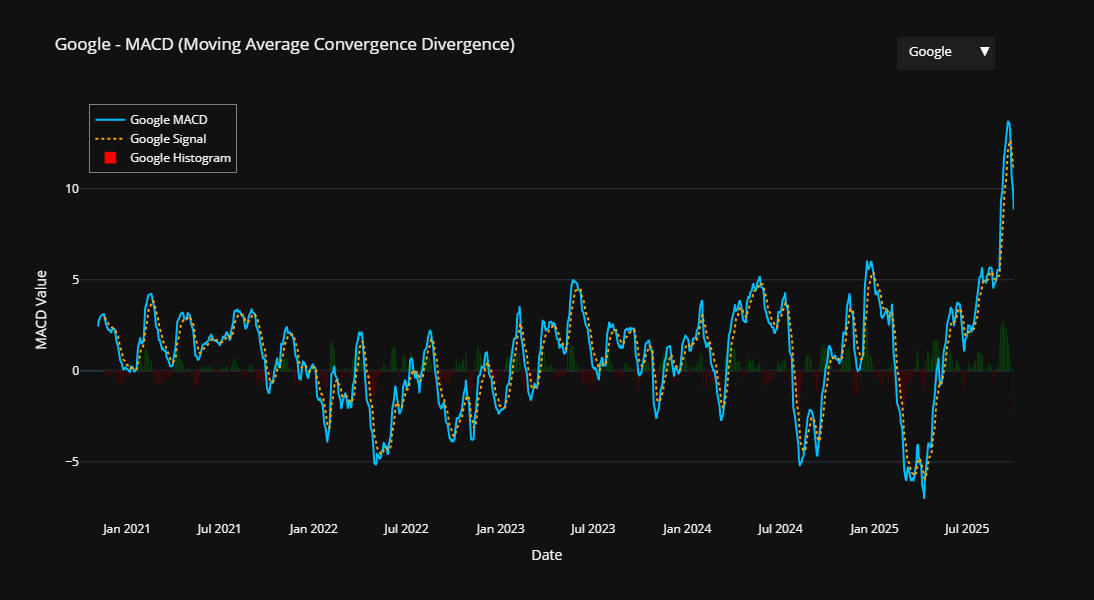

In [28]:
display(Image(filename="plotly_images/MACD.png"))



This chart displays the Moving Average Convergence Divergence (MACD) indicator for Google stock from early 2021 to mid-2025, which consists of the MACD line (blue), the Signal line (orange dotted), and the Histogram (red/green bars). 

The overall pattern shows a cyclical momentum with large swings both above and below the zero line. MACD values were generally positive in 2021, turned negative during the 2022-early 2023 downturn, and then trended positively with volatility through 2023 and 2024.

Most recently, the sharp price rally in mid-2025 is confirmed by a dramatic surge in the MACD line well above 10, with the Histogram bars (green) peaking, indicating extremely strong positive momentum as the MACD line rapidly diverged from the Signal line.

#### **2. Momentum Indicators (Speed of change)**

**a) Relative Strength Index (RSI)**

The Relative Strength Index (RSI) is a momentum oscillator that measures the speed and magnitude of recent price changes to evaluate whether a stock is overbought or oversold. It ranges from 0 to 100, with values above 70 indicating potential overbought conditions and below 30 suggesting oversold conditions. For companies like Apple, Google, Microsoft, and Nvidia, RSI helps investors gauge whether recent rallies or declines are sustainable or due for a correction, offering valuable timing cues for potential entry and exit points in their fast-moving stock trends.

In [29]:
# Relative Strength Index (RSI)

# --- Step 1: Compute RSI for all companies ---
companies = {
    "Google": df_google,
    "Microsoft": df_microsoft,
    "Apple": df_apple,
    "Nvidia": df_nvidia
}

for df in companies.values():
    df['RSI_14'] = ta.momentum.rsi(df['Close'], window=14)

# --- Step 2: Create figure ---
fig = go.Figure()

for i, (name, df) in enumerate(companies.items()):
    visible = (i == 0)  # Only first company visible by default
    
    # Stock Price Trace
    fig.add_trace(go.Scatter(
        x=df.index, y=df['Close'], mode='lines',
        name=f'{name} Price', visible=visible,
        line=dict(color='deepskyblue', width=2),
        yaxis='y1'
    ))
    
    # RSI Trace
    fig.add_trace(go.Scatter(
        x=df.index, y=df['RSI_14'], mode='lines',
        name=f'{name} RSI', visible=visible,
        line=dict(color='orange', width=2),
        yaxis='y2'
    ))

# --- Step 3: Dropdown filter ---
buttons = []
for i, name in enumerate(companies.keys()):
    visible = [False] * (2 * len(companies))
    visible[i*2:i*2+2] = [True, True]
    buttons.append(dict(
        label=name, method='update',
        args=[{'visible': visible},
              {'title': f'{name} Price and RSI (14-day)'}]
    ))

# --- Step 4: Layout with dual y-axis and dropdown ---
fig.update_layout(
    title="Google Price & RSI (14-day)",
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price ($)', side='left', showgrid=True),
    yaxis2=dict(title='RSI', overlaying='y', side='right', range=[0,100],
                showgrid=False, tickvals=[0,30,50,70,100]),
    template='plotly_dark',
    height=600,
    updatemenus=[dict(
        type='dropdown', active=0, buttons=buttons,
        x=0.98, xanchor='right', y=1.15, yanchor='top',
        bgcolor='#1E1E1E', bordercolor='#00FFFF', borderwidth=1.5,
        font=dict(color='white', size=13), direction='down', showactive=True
    )]
)

# --- Step 5: Add overbought/oversold lines on RSI axis ---
fig.add_hline(y=70, line_dash="dot", line_color="red", yref='y2',
              annotation_text="Overbought", annotation_position="top left")
fig.add_hline(y=30, line_dash="dot", line_color="green", yref='y2',
              annotation_text="Oversold", annotation_position="bottom left")

fig.show()


C:\Users\damie\AppData\Local\Temp\ipykernel_21892\616140502.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\damie\AppData\Local\Temp\ipykernel_21892\616140502.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\damie\AppData\Local\Temp\ipykernel_21892\616140502.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

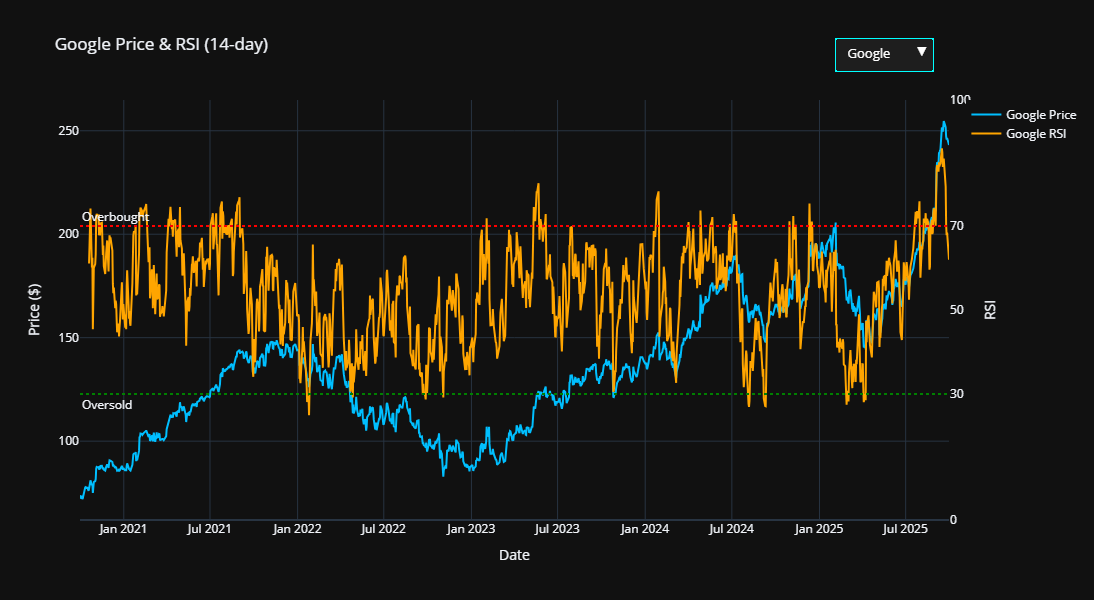

In [30]:
display(Image(filename="plotly_images/RSI.png"))

The Google price shows a substantial net increase over the period. The RSI frequently crosses the 70 threshold, especially during strong upward trends, which correctly signaled periods of potential price consolidation or reversal, such as in early 2022 and mid-2023. Conversely, the RSI dipped close to or below the 30 oversold level during major corrections, such as in mid-2022 and early 2023, often marking a local price bottom before the next rally. 

The sharpest rally in mid-2025 saw the RSI surge well above 70, confirming the extreme momentum. In essence, the RSI successfully acted as a key momentum and potential reversal indicator throughout the stock's multi-year trend.

#### **3. Volatility Indicators (Risk/Range)**

**a) Bollinger Bands (BB)**

Bollinger Bands consist of a moving average (usually 20 days) surrounded by an upper and lower band, each representing a certain number of standard deviations from the average. They help visualize volatility — when the bands widen, the market is more volatile; when they contract, volatility is low. For Apple, Google, Microsoft, and Nvidia, Bollinger Bands are useful for identifying potential breakout or reversal points, as prices touching or breaching the bands often signal overextended market moves or upcoming shifts in trend direction.

In [31]:
#Bollinger Bands (BB)

# --- Step 1: Compute Bollinger Bands for all companies ---
companies = {
    "Google": df_google,
    "Microsoft": df_microsoft,
    "Apple": df_apple,
    "Nvidia": df_nvidia
}

for df in companies.values():
    df['BB_High'] = ta.volatility.bollinger_hband(df['Close'], window=20, window_dev=2)
    df['BB_Low'] = ta.volatility.bollinger_lband(df['Close'], window=20, window_dev=2)

# --- Step 2: Create figure ---
fig = go.Figure()

for i, (name, df) in enumerate(companies.items()):
    visible = (i == 0)  # Only first company visible by default
    
    # Price Trace
    fig.add_trace(go.Scatter(
        x=df.index, y=df['Close'], mode='lines',
        name=f'{name} Price', visible=visible,
        line=dict(color='deepskyblue', width=2)
    ))
    
    # Upper Band Trace (transparent fill)
    fig.add_trace(go.Scatter(
        x=df.index, y=df['BB_High'], mode='lines',
        name=f'{name} Upper Band', visible=visible,
        line=dict(color='brown', width=1),
        fill=None
    ))
    
    # Lower Band Trace (filled area between bands)
    fig.add_trace(go.Scatter(
        x=df.index, y=df['BB_Low'], mode='lines',
        name=f'{name} Lower Band', visible=visible,
        line=dict(color='orange', width=1),
        fill='none'
    ))

# --- Step 3: Dropdown filter ---
buttons = []
for i, name in enumerate(companies.keys()):
    visible = [False] * (3 * len(companies))
    visible[i*3:i*3+3] = [True, True, True]
    buttons.append(dict(
        label=name, method='update',
        args=[{'visible': visible},
              {'title': f'{name} Price with Bollinger Bands (20-day)'}]
    ))

# --- Step 4: Layout ---
fig.update_layout(
    title="Google Price with Bollinger Bands (20-day)",
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price ($)'),
    template='plotly_dark',
    height=600,
    updatemenus=[dict(
        type='dropdown', active=0, buttons=buttons,
        x=0.98, xanchor='right', y=1.15, yanchor='top',
        bgcolor='#1E1E1E', bordercolor='#00FFFF', borderwidth=1.5,
        font=dict(color='white', size=13), direction='down', showactive=True
    )]
)

fig.show()


C:\Users\damie\AppData\Local\Temp\ipykernel_21892\1776874408.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\damie\AppData\Local\Temp\ipykernel_21892\1776874408.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\damie\AppData\Local\Temp\ipykernel_21892\1776874408.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

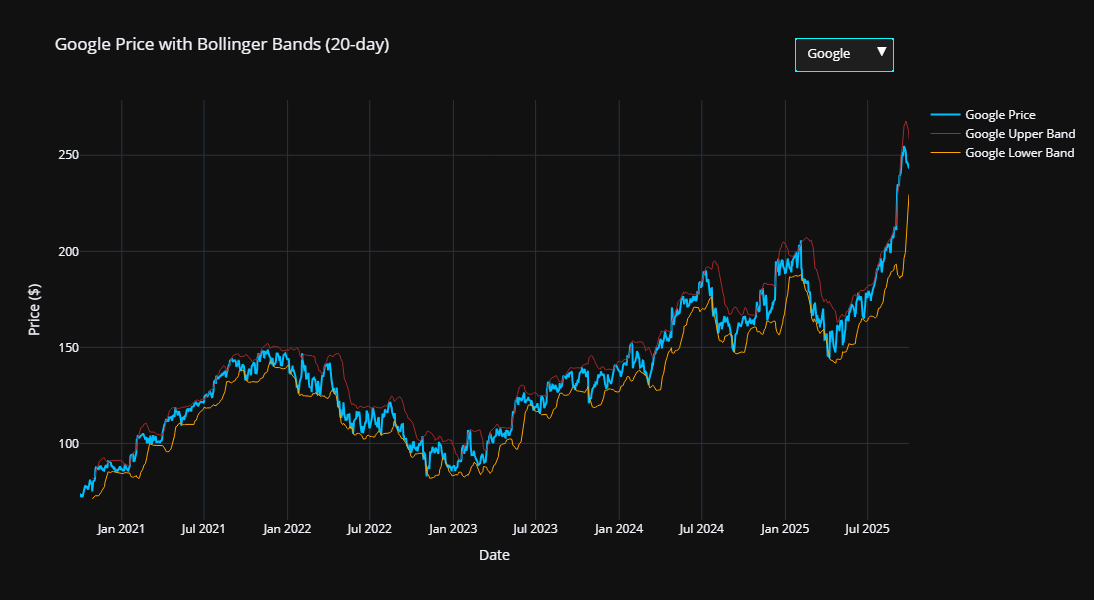

In [32]:
display(Image(filename="plotly_images/BB.png"))

For google, the price shows a strong overall upward trend, particularly from early 2023 onwards. The chart clearly illustrates periods of high volatility where the bands widen significantly (e.g., late 2021 and early 2025), and periods of consolidation where the bands narrow (e.g., late 2022). 

Notably, the price frequently tests and briefly exceeds the Upper Band during strong upward movements, such as the sharp rally in mid-2025, which can be interpreted as the stock being momentarily overbought. Conversely, the price tests the Lower Band during market corrections, indicating an area of potential support.

**b) Average True Range (ATR)**

The Average True Range (ATR) measures market volatility by calculating the average of true ranges over a set period (commonly 14 days). Unlike indicators that show direction, ATR focuses solely on the magnitude of price movement. For the four tech giants — Apple, Google, Microsoft, and Nvidia — ATR helps assess risk levels and potential price fluctuations, providing valuable input for setting stop-loss levels and understanding how turbulent or stable a stock’s recent trading activity has been.

In [33]:
# Average True Range (ATR)

# --- Step 1: Compute ATR for all companies ---
companies = {
    "Google": df_google,
    "Microsoft": df_microsoft,
    "Apple": df_apple,
    "Nvidia": df_nvidia
}

for df in companies.values():
    df['ATR'] = ta.volatility.average_true_range(df['High'], df['Low'], df['Close'], window=14)

# --- Step 2: Create figure ---
fig = go.Figure()

for i, (name, df) in enumerate(companies.items()):
    visible = (i == 0)  # Only first company visible by default
    
    # Stock Price Trace (left y-axis)
    fig.add_trace(go.Scatter(
        x=df.index, y=df['Close'], mode='lines',
        name=f'{name} Close', visible=visible,
        line=dict(color='deepskyblue', width=2),
        yaxis='y1'
    ))
    
    # ATR Trace (right y-axis)
    fig.add_trace(go.Scatter(
        x=df.index, y=df['ATR'], mode='lines',
        name=f'{name} ATR (14-day)', visible=visible,
        line=dict(color='lime', width=2),
        yaxis='y2'
    ))

# --- Step 3: Dropdown filter ---
buttons = []
for i, name in enumerate(companies.keys()):
    visible = [False] * (2 * len(companies))
    visible[i*2:i*2+2] = [True, True]
    buttons.append(dict(
        label=name,
        method='update',
        args=[{'visible': visible},
              {'title': f'{name} Price & ATR (14-day)'}]
    ))

# --- Step 4: Layout with dual y-axis ---
fig.update_layout(
    title="Google - Price & Average True Range (14-day)",
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price ($)', side='left', showgrid=True),
    yaxis2=dict(title='ATR', overlaying='y', side='right', showgrid=False),
    template='plotly_dark',
    height=600,
    updatemenus=[dict(
        type='dropdown', active=0, buttons=buttons,
        x=0.98, xanchor='right', y=1.12, yanchor='top',
        bgcolor='#1E1E1E', bordercolor='#00FFFF', borderwidth=1.5,
        font=dict(color='white', size=13), direction='down', showactive=True
    )]
)

fig.show()


C:\Users\damie\AppData\Local\Temp\ipykernel_21892\727384390.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\damie\AppData\Local\Temp\ipykernel_21892\727384390.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\damie\AppData\Local\Temp\ipykernel_21892\727384390.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

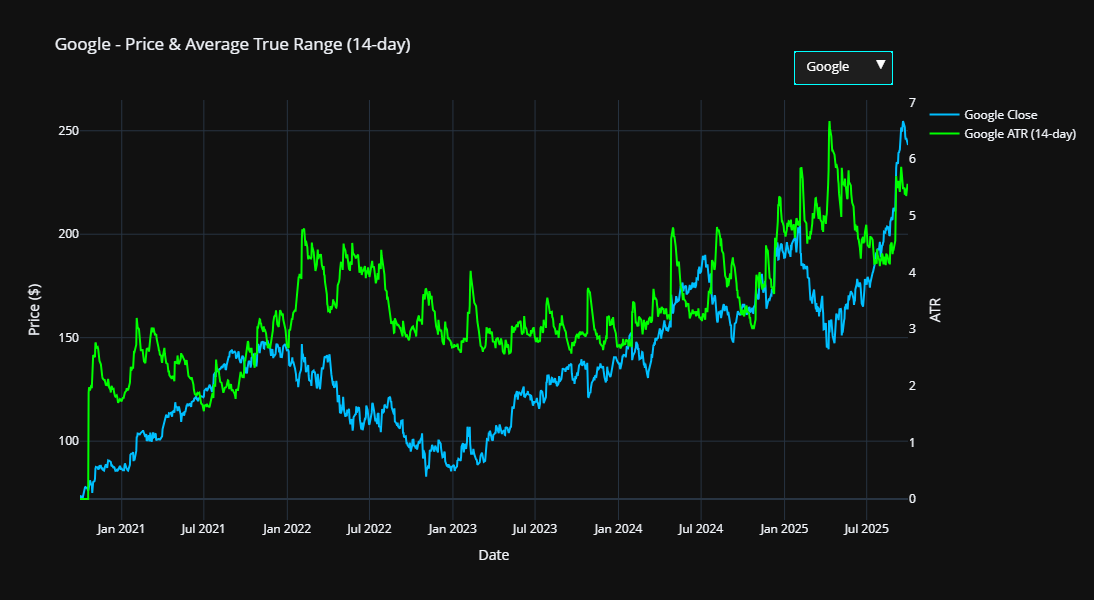

In [34]:
display(Image(filename="plotly_images/ATR.png"))

For google within this period, the price exhibits a general long-term upward trend despite significant intermediate fluctuations. The ATR line confirms that the periods of large price swings, such as the major downturn from late 2021 to early 2023 and the sharp rally from early 2023 onwards, were accompanied by high volatility (higher ATR values, peaking near $5.00-$7.00). 

Conversely, periods where the price moved sideways or in a more controlled fashion were characterized by lower volatility (lower ATR values, around $3.00-$4.00). Notably, the volatility has been significantly higher during the strong rally in 2025, with the ATR peaking near $7.00, suggesting that the recent massive price movements are accompanied by large daily trading ranges.

#### **4. Volume Indicators (Confirmation/Strength)**

**a) On-Balance Volume (OBV)**

On-Balance Volume (OBV) is a momentum indicator that links price movement with trading volume to gauge buying and selling pressure. It adds volume on up days and subtracts it on down days. A rising OBV suggests that buyers are driving prices higher, while a falling OBV signals selling pressure. For Apple, Google, Microsoft, and Nvidia, OBV helps confirm the strength of price trends — if prices are rising but OBV is flat or declining, it may indicate weakening momentum and potential reversals.

In [35]:
#On-Balance Volume (OBV)

# --- Step 1: Compute OBV for all companies ---
companies = {
    "Google": df_google,
    "Microsoft": df_microsoft,
    "Apple": df_apple,
    "Nvidia": df_nvidia
}

for name, df in companies.items():
    df['OBV'] = ta.volume.on_balance_volume(df['Close'], df['Volume'])

# --- Step 2: Create figure ---
fig = go.Figure()

for i, (name, df) in enumerate(companies.items()):
    visible = (i == 0)  # Only first company visible by default
    
    # Stock Price (left y-axis)
    fig.add_trace(go.Scatter(
        x=df.index, y=df['Close'],
        mode='lines', name=f'{name} Price',
        line=dict(color='deepskyblue', width=2),
        visible=visible,
        yaxis='y1'
    ))
    
    # OBV (right y-axis)
    fig.add_trace(go.Scatter(
        x=df.index, y=df['OBV'],
        mode='lines', name=f'{name} OBV',
        line=dict(color='orange', width=2),
        visible=visible,
        yaxis='y2'
    ))

# --- Step 3: Dropdown filter ---
buttons = []
for i, name in enumerate(companies.keys()):
    visible = [False] * (2 * len(companies))
    visible[i*2:i*2+2] = [True, True]
    buttons.append(dict(
        label=name,
        method='update',
        args=[{'visible': visible},
              {'title': f'{name} Price & OBV'}]
    ))

# --- Step 4: Layout ---
fig.update_layout(
    title="Google Price & On-Balance Volume (OBV)",
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price ($)', side='left', showgrid=True),
    yaxis2=dict(title='OBV', overlaying='y', side='right', showgrid=False),
    template='plotly_dark',
    height=600,
    updatemenus=[dict(
        type='dropdown', active=0, buttons=buttons,
        x=0.98, xanchor='right', y=1.15, yanchor='top',
        bgcolor='#1E1E1E', bordercolor='#00FFFF', borderwidth=1.5,
        font=dict(color='white', size=13), direction='down', showactive=True
    )],
    legend=dict(x=0.01, y=0.99, bordercolor='gray', borderwidth=1, font=dict(size=12))
)

fig.show()


C:\Users\damie\AppData\Local\Temp\ipykernel_21892\3388181291.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\damie\AppData\Local\Temp\ipykernel_21892\3388181291.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\damie\AppData\Local\Temp\ipykernel_21892\3388181291.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

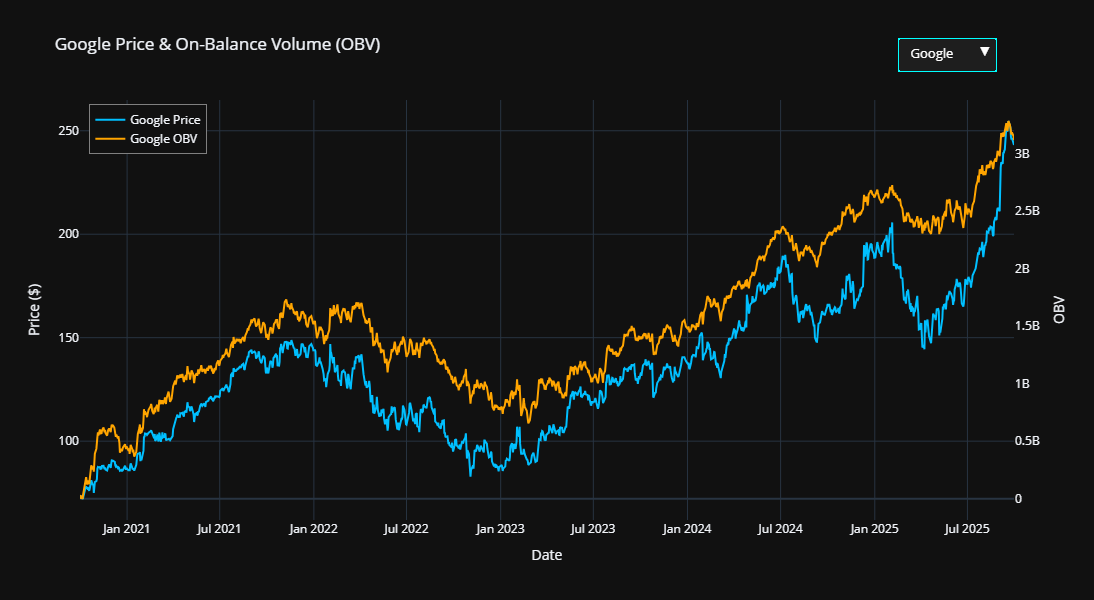

In [36]:
display(Image(filename="plotly_images/OBV.png"))

For google, the overall trend for both the price and the OBV is strongly positive over the period. The OBV, which measures buying and selling pressure by accumulating volume, generally confirms the price movement, rising when the price rises and falling during downturns, indicating a healthy trend. A key period is the rally from early 2023 to mid-2025, where both the price and the OBV consistently ascend to new highs, with the OBV reaching nearly 3.5 billion by mid-2025, confirming the strong upward momentum and investor conviction behind the price rally. 

Throughout the entire period, the OBV and price largely move in close synchronization, suggesting that the price changes are being driven by significant volume.

**b) Volume Weighted Average Price (VWAP)**

Volume Weighted Average Price (VWAP) represents the average price of a stock throughout the day, weighted by volume. It provides insight into the fair value of a stock relative to its trading activity. Traders and analysts use VWAP as a benchmark to assess whether a stock is being bought or sold at a good price. For Apple, Google, Microsoft, and Nvidia, VWAP helps identify institutional trading zones — prices above VWAP suggest bullish momentum, while prices below VWAP imply bearish sentiment.

In [37]:
# Volume Weighted Average Price (VWAP)

# --- Step 1: Compute VWAP for all companies ---
companies = {
    "Google": df_google,
    "Microsoft": df_microsoft,
    "Apple": df_apple,
    "Nvidia": df_nvidia
}

for name, df in companies.items():
    df['VWAP'] = ta.volume.volume_weighted_average_price(df['High'], df['Low'], df['Close'], df['Volume'])

# --- Step 2: Create figure ---
fig = go.Figure()

for i, (name, df) in enumerate(companies.items()):
    visible = (i == 0)  # Only first company visible by default
    
    # Stock Price
    fig.add_trace(go.Scatter(
        x=df.index, y=df['Close'],
        mode='lines', name=f'{name} Price',
        line=dict(color='deepskyblue', width=2),
        visible=visible,
        yaxis='y1'
    ))
    
    # VWAP
    fig.add_trace(go.Scatter(
        x=df.index, y=df['VWAP'],
        mode='lines', name=f'{name} VWAP',
        line=dict(color='orange', width=2, dash='dot'),
        visible=visible,
        yaxis='y1'
    ))

# --- Step 3: Dropdown filter ---
buttons = []
for i, name in enumerate(companies.keys()):
    visible = [False] * (2 * len(companies))
    visible[i*2:i*2+2] = [True, True]
    buttons.append(dict(
        label=name,
        method='update',
        args=[{'visible': visible},
              {'title': f'{name} Price & VWAP'}]
    ))

# --- Step 4: Layout ---
fig.update_layout(
    title="Google Price & VWAP",
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price ($)', showgrid=True),
    template='plotly_dark',
    height=600,
    updatemenus=[dict(
        type='dropdown', active=0, buttons=buttons,
        x=0.98, xanchor='right', y=1.15, yanchor='top',
        bgcolor='#1E1E1E', bordercolor='#00FFFF', borderwidth=1.5,
        font=dict(color='white', size=13), direction='down', showactive=True
    )],
    legend=dict(x=0.01, y=0.99, bordercolor='gray', borderwidth=1, font=dict(size=12))
)

fig.show()


C:\Users\damie\AppData\Local\Temp\ipykernel_21892\3951181901.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\damie\AppData\Local\Temp\ipykernel_21892\3951181901.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\damie\AppData\Local\Temp\ipykernel_21892\3951181901.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

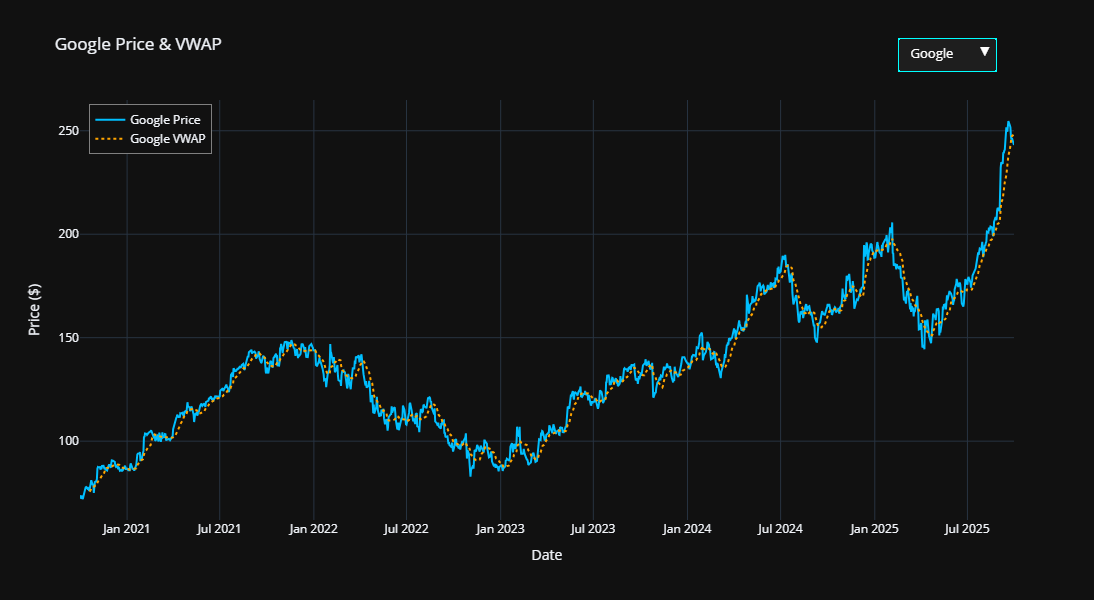

In [38]:
display(Image(filename="plotly_images/vwap.png"))

For google, the overall trend shows significant price volatility but an overwhelming upward trajectory over the four-and-a-half-year period, starting below $100 and surpassing $250 by mid-2025. A notable downturn occurred from late 2021 to early 2023, where the price dropped from around $150 to nearly $90, before resuming a strong rally. The VWAP closely follows the market price throughout the period, serving as a key indicator of the average price at which the stock traded, adjusted for trading volume. The current period (mid-2025) shows a sharp rise, with the price briefly moving above the VWAP before the two lines converge near the peak.

####  **5. Price Indicators**

**a) Autocorrelation (ACF)**

Autocorrelation (ACF) measures how a stock’s current price relates to its past prices over different time lags. It helps identify repeating patterns, such as cycles or seasonality, in time series data. A high positive autocorrelation means prices tend to follow their past direction, while negative values suggest reversals. For Apple, Google, Microsoft, and Nvidia, ACF helps assess whether recent movements are momentum-driven or random — a key insight before forecasting future prices.

In [39]:
import plotly.graph_objects as go
from statsmodels.tsa.stattools import acf
import numpy as np

# --- Step 1: Compute autocorrelation with confidence intervals ---
companies = {
    "Google": df_google,
    "Microsoft": df_microsoft,
    "Apple": df_apple,
    "Nvidia": df_nvidia
}

nlags = 50  # number of lags
acf_dict = {}
confint_dict = {}

for name, df in companies.items():
    acf_values, confint = acf(df['Close'], nlags=nlags, alpha=0.05)
    acf_dict[name] = acf_values
    confint_dict[name] = confint  # lower and upper confidence interval

# --- Step 2: Create figure ---
fig = go.Figure()

for i, name in enumerate(companies.keys()):
    visible = (i == 0)  # show only the first company by default
    lags = list(range(len(acf_dict[name])))
    
    # Autocorrelation bars
    fig.add_trace(go.Bar(
        x=lags,
        y=acf_dict[name],
        name=name,
        marker_color='deepskyblue',
        visible=visible
    ))
    
    # Upper and lower confidence lines
    fig.add_trace(go.Scatter(
        x=lags, y=confint_dict[name][:,1]-acf_dict[name],  # upper line
        mode='lines',
        line=dict(color='orange'),
        name=f'{name} 95% CI Upper',
        visible=visible,
        showlegend=False
    ))
    fig.add_trace(go.Scatter(
        x=lags, y=confint_dict[name][:,0]-acf_dict[name],  # lower line
        mode='lines',
        line=dict(color='orange'),  # removed dash='dot' for solid line
        name=f'{name} 95% CI Lower',
        visible=visible,
        showlegend=False
    ))

# --- Step 3: Dropdown filter ---
buttons = []
for i, name in enumerate(companies.keys()):
    visible = [False] * (3 * len(companies))  # 1 bar + 2 CI lines per company
    visible[i*3:i*3+3] = [True, True, True]
    buttons.append(dict(
        label=name,
        method='update',
        args=[{'visible': visible},
              {'title': f'{name} Autocorrelation of Close Prices with 95% CI'}]
    ))

# --- Step 4: Layout ---
fig.update_layout(
    title="Google Autocorrelation of Close Prices with 95% CI",
    xaxis_title="Lag",
    yaxis_title="Autocorrelation",
    template='plotly_dark',
    updatemenus=[dict(
        type='dropdown', active=0, buttons=buttons,
        x=0.98, xanchor='right', y=1.15, yanchor='top',
        bgcolor='#1E1E1E', bordercolor='#00FFFF', borderwidth=1.5,
        font=dict(color='white', size=13), direction='down', showactive=True
    )],
    height=600
)

fig.show()


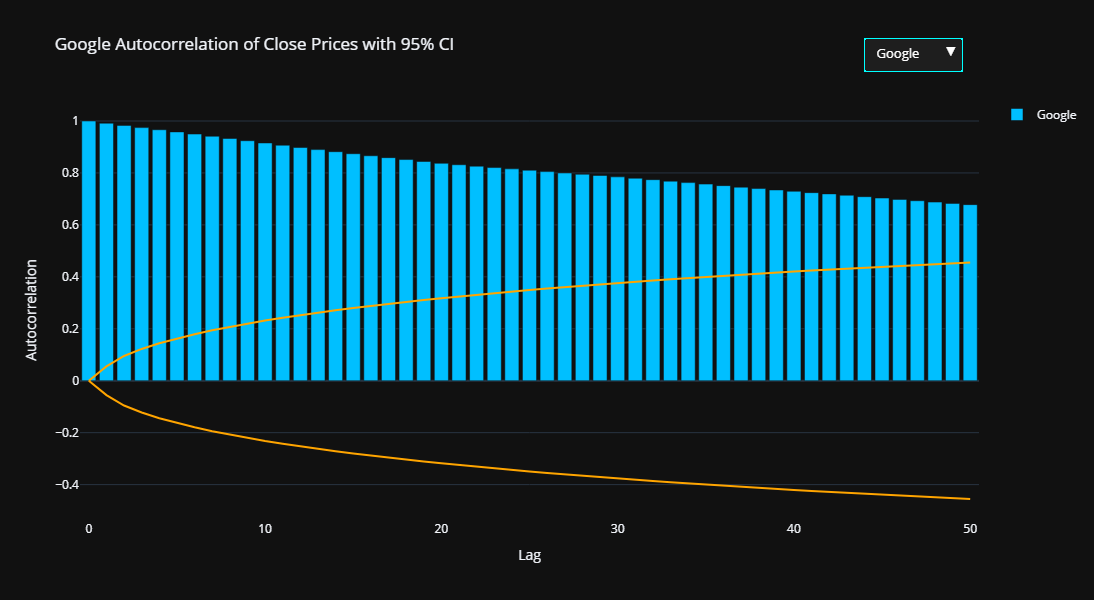

In [40]:
display(Image(filename="plotly_images/autocorr.png"))

For Google stock over a period of up to 50 lags, with the orange lines representing the 95% Confidence Interval (CI). The chart clearly shows a very strong, positive, and slow-decaying autocorrelation. The bar for Lag 1 is nearly 1.0, indicating that yesterday's price is highly predictive of today's price. Crucially, the autocorrelation bars remain significantly above the 95% CI (the upper orange curve) even out to Lag 50, where the coefficient is still around 0.7. This pattern is typical for a non-stationary time series like a stock price, suggesting that the price has a very long memory and is not a "random walk" around a constant mean.

**b) Partial Autocorrelation Function (PACF)**

Partial Autocorrelation (PACF) isolates the direct relationship between a stock’s current price and its past prices, removing the influence of intermediate lags. This is particularly useful for determining the exact lag order when building predictive models like ARIMA or LSTM. For the four companies, PACF helps identify how many previous time steps significantly affect current stock prices, improving model accuracy and avoiding overfitting.

In [41]:
# Partial Autocorrelation Function (PACF)

from statsmodels.tsa.stattools import pacf


# --- Step 1: Prepare companies ---
companies = {
    "Google": df_google,
    "Microsoft": df_microsoft,
    "Apple": df_apple,
    "Nvidia": df_nvidia
}

nlags = 50
pacf_dict = {}
upper_dict = {}
lower_dict = {}
n_dict = {name: len(df['Close']) for name, df in companies.items()}

# --- Step 2: Compute PACF and zero-centered 95% CI ---
for name, df in companies.items():
    pacf_values = pacf(df['Close'], nlags=nlags, method='yw')
    pacf_dict[name] = pacf_values
    conf_level = 1.96 / np.sqrt(n_dict[name])
    upper_dict[name] = np.full_like(pacf_values, conf_level)
    lower_dict[name] = np.full_like(pacf_values, -conf_level)

# --- Step 3: Create Plotly figure ---
fig = go.Figure()

for i, name in enumerate(companies.keys()):
    visible = (i == 0)
    lags = list(range(len(pacf_dict[name])))

    # PACF bars
    fig.add_trace(go.Bar(
        x=lags,
        y=pacf_dict[name],
        name=name,
        marker_color='deepskyblue',
        opacity=0.7,
        visible=visible
    ))

    # Confidence interval shaded area with solid red line
    fig.add_trace(go.Scatter(
        x=lags + lags[::-1],
        y=list(upper_dict[name]) + list(lower_dict[name][::-1]),
        fill='toself',
        fillcolor='rgba(255,0,0,0.2)',
        line=dict(color='red', width=2),  # solid red line
        name=f'{name} 95% CI',
        visible=visible,
        showlegend=True
    ))

# --- Step 4: Dropdown filter ---
buttons = []
for i, name in enumerate(companies.keys()):
    visible = [False] * (2 * len(companies))  # 1 bar + 1 CI per company
    visible[i*2:i*2+2] = [True, True]
    buttons.append(dict(
        label=name,
        method='update',
        args=[{'visible': visible},
              {'title': f'{name} Partial Autocorrelation of Close Prices with 95% CI'}]
    ))

# --- Step 5: Layout ---
fig.update_layout(
    title="Google Partial Autocorrelation of Close Prices with 95% CI",
    xaxis_title="Lag",
    yaxis_title="Partial Autocorrelation",
    template='plotly_dark',
    updatemenus=[dict(
        type='dropdown', active=0, buttons=buttons,
        x=0.98, xanchor='right', y=1.15, yanchor='top',
        bgcolor='#1E1E1E', bordercolor='#00FFFF', borderwidth=1.5,
        font=dict(color='white', size=13), direction='down', showactive=True
    )],
    height=600
)

fig.show()


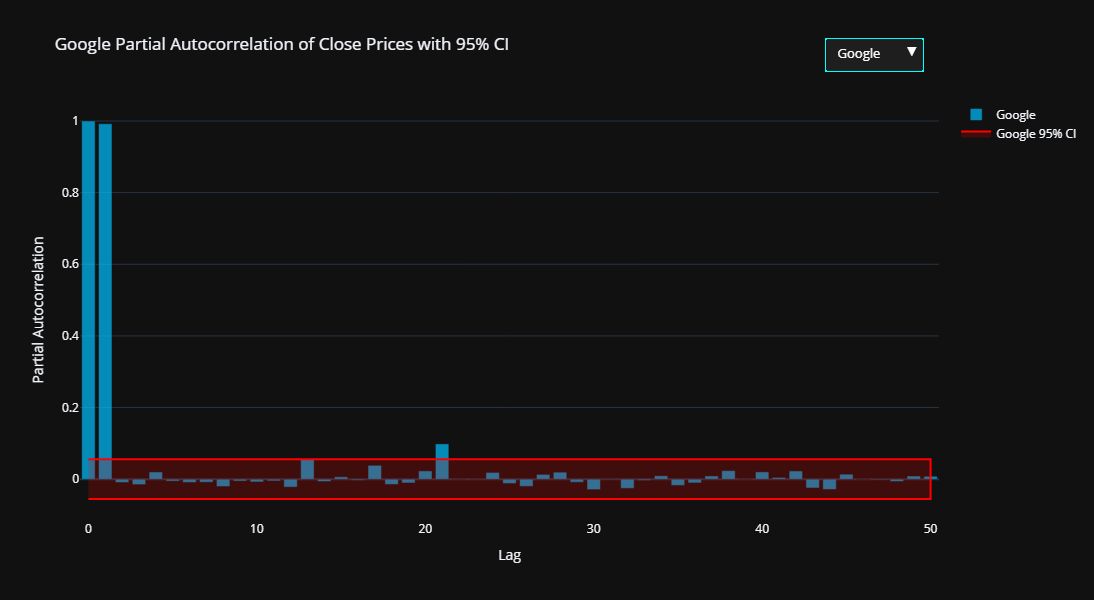

In [42]:
display(Image(filename="plotly_images/partial.png"))

The plot shows a very strong spike at Lag 1 (a partial autocorrelation coefficient of nearly 1.0), which is common for stock prices. Crucially, all subsequent lags (Lag 2 onwards) fall within the 95% confidence interval, except for a minor, short spike around Lag 20. The general pattern of a single significant spike at Lag 1 and immediate cut-off thereafter is characteristic of a non-stationary series that might become an AR(1) process after differencing. In simple terms, after removing the effect of the previous day's price (Lag 1), there is essentially no direct partial correlation with prices from two or more days ago.

### ***Exploring Stationality***

The Augmented Dickey-Fuller (ADF) test checks whether a stock’s price series is stationary — meaning its statistical properties like mean and variance do not change over time. Non-stationary data (like raw stock prices) can mislead predictive models because trends or seasonality dominate the pattern. Applying ADF to Apple, Google, Microsoft, and Nvidia helps determine if differencing or transformation is needed before modeling, ensuring that predictions rely on meaningful price signals rather than long-term drift or noise.

In [43]:
# Augmented Dickey-Fuller (ADF) Test
from statsmodels.tsa.stattools import adfuller


# --- Step 1: Prepare companies ---
companies = {
    "Google": df_google,
    "Microsoft": df_microsoft,
    "Apple": df_apple,
    "Nvidia": df_nvidia
}

# --- Step 2: Run ADF test ---
adf_results = []

for name, df in companies.items():
    result = adfuller(df['Close'])
    adf_results.append({
        'Company': name,
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Lags Used': result[2],
        'Observations': result[3],
        'Critical Value (1%)': result[4]['1%'],
        'Critical Value (5%)': result[4]['5%'],
        'Critical Value (10%)': result[4]['10%'],
        'Stationary?': 'Yes' if result[1] < 0.05 else 'No'
    })

# --- Step 3: Display results as a table ---
adf_df = pd.DataFrame(adf_results)
adf_df


Company  ADF Statistic   p-value  Lags Used  Observations  \
0     Google      -0.156408  0.943522          0          1254   
1  Microsoft      -0.399089  0.910251          0          1254   
2      Apple      -1.168482  0.687005          1          1253   
3     Nvidia       0.902977  0.993129         22          1232   

   Critical Value (1%)  Critical Value (5%)  Critical Value (10%) Stationary?  
0            -3.435575            -2.863848             -2.567999          No  
1            -3.435575            -2.863848             -2.567999          No  
2            -3.435580            -2.863849             -2.568000          No  
3            -3.435669            -2.863889             -2.568021          No

#### ***Data Pre-processing for Model***

In [44]:
# Checking the existing dataset

df_apple.tail()


Price            Close        High         Low        Open    Volume  \
Date                                                                   
2025-09-24  252.309998  255.740005  251.039993  255.220001  42303700   
2025-09-25  256.869995  257.170013  251.710007  253.210007  55202100   
2025-09-26  255.460007  257.600006  253.779999  254.100006  46076300   
2025-09-29  254.429993  255.000000  253.009995  254.559998  40127700   
2025-09-30  254.630005  255.919998  253.110001  254.860001  37704300   

Price           SMA_20      EMA_20      MACD  MACD_Signal  MACD_Diff  \
Date                                                                   
2025-09-24  238.300500  239.425894  6.723994     5.229912   1.494083   
2025-09-25  239.619499  241.087237  7.283611     5.640652   1.642960   
2025-09-26  240.764500  242.456072  7.526576     6.017836   1.508740   
2025-09-29  241.878999  243.596445  7.548993     6.324068   1.224926   
2025-09-30  243.124500  244.647260  7.496484     6.558551   0.937933   

Price          RSI_14     BB_High      BB_Low       ATR         OBV  \
Date                                                                  
2025-09-24  68.918706  254.249553  222.351446  5.131907  1865195000   
2025-09-25  71.975898  257.060191  222.178807  5.155343  1920397100   
2025-09-26  69.693194  259.180543  222.348456  5.059962  1874320800   
2025-09-29  67.996660  260.764310  222.993689  4.873537  1834193100   
2025-09-30  68.158752  261.923416  224.325583  4.726141  1871897400   

Price             VWAP  
Date                    
2025-09-24  240.939026  
2025-09-25  241.854996  
2025-09-26  242.737259  
2025-09-29  243.779933  
2025-09-30  245.759921

##### **1. Creating Target and Lag features**

In [45]:

def prepare_data(df):
    # Create lag features (previous days’ values)
    df['Close_lag1'] = df['Close'].shift(1)
    df['Close_lag2'] = df['Close'].shift(2)
    df['Close_lag3'] = df['Close'].shift(3)
    
    # Create Target (next-day price or direction)
    df['Target_Price'] = df['Close'].shift(-1)              # Regression
    df['Target_Direction'] = (df['Close'].shift(-1) > df['Close']).astype(int)  # Classification
    
    # Drop missing rows from shifts
    df.dropna(inplace=True)
    return df


apple = prepare_data(df_apple)
microsoft = prepare_data(df_microsoft)
google = prepare_data(df_google)
nvidia = prepare_data(df_nvidia)


C:\Users\damie\AppData\Local\Temp\ipykernel_21892\131663964.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\damie\AppData\Local\Temp\ipykernel_21892\131663964.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\damie\AppData\Local\Temp\ipykernel_21892\131663964.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

##### **2. Feature selection**

In [46]:
features = ['Close','High','Low','Open','Volume','SMA_20','EMA_20','MACD','MACD_Signal','MACD_Diff',
            'RSI_14','BB_High','BB_Low','ATR','OBV','VWAP','Close_lag1','Close_lag2','Close_lag3']


##### **3. Training and Evaluation**

You can run either:

* Regression model (predict next-day price), or

* Classification model (predict direction).

Here’s both — starting with classification (since it’s common for stock prediction).

In [47]:
# Predicting Next-Day Direction (Up/Down)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

def train_predict_direction(df, company_name):
    X = df[features]
    y = df['Target_Direction']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    
    print(f"\n📈 {company_name} Model Performance:")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))
    
    return acc


results = {}
results['Apple'] = train_predict_direction(apple, 'Apple')
results['Microsoft'] = train_predict_direction(microsoft, 'Microsoft')
results['Google'] = train_predict_direction(google, 'Google')
results['Nvidia'] = train_predict_direction(nvidia, 'Nvidia')




📈 Apple Model Performance:
Accuracy: 0.4776
              precision    recall  f1-score   support

           0       0.45      0.61      0.52       114
           1       0.52      0.36      0.42       131

    accuracy                           0.48       245
   macro avg       0.49      0.49      0.47       245
weighted avg       0.49      0.48      0.47       245


📈 Microsoft Model Performance:
Accuracy: 0.4449
              precision    recall  f1-score   support

           0       0.42      0.72      0.53       107
           1       0.52      0.23      0.32       138

    accuracy                           0.44       245
   macro avg       0.47      0.48      0.43       245
weighted avg       0.47      0.44      0.41       245


📈 Google Model Performance:
Accuracy: 0.4898
              precision    recall  f1-score   support

           0       0.47      0.77      0.58       113
           1       0.56      0.25      0.35       132

    accuracy                           0.4

In [48]:
# Predicting Next-Day Price (Regression)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def train_predict_price(df, company_name):
    X = df[features]
    y = df['Target_Price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    
    print(f"\n💹 {company_name} Model Performance:")
    print(f"MAE: {mae:.4f} | RMSE: {rmse:.4f} | R²: {r2:.4f}")
    
    return {'MAE': mae, 'RMSE': rmse, 'R2': r2}


price_results = {}
price_results['Apple'] = train_predict_price(apple, 'Apple')
price_results['Microsoft'] = train_predict_price(microsoft, 'Microsoft')
price_results['Google'] = train_predict_price(google, 'Google')
price_results['Nvidia'] = train_predict_price(nvidia, 'Nvidia') 



💹 Apple Model Performance:
MAE: 8.5167 | RMSE: 11.2440 | R²: 0.5808

💹 Microsoft Model Performance:
MAE: 21.8986 | RMSE: 33.3385 | R²: 0.5020

💹 Google Model Performance:
MAE: 9.8618 | RMSE: 18.3634 | R²: 0.3986

💹 Nvidia Model Performance:
MAE: 18.4608 | RMSE: 25.0951 | R²: -0.1902


##### **4. Comparing Performance**

In [49]:
# for comparison 

comparison = pd.DataFrame(results.items(), columns=['Company', 'Accuracy'])
print(comparison)


     Company  Accuracy
0      Apple  0.477551
1  Microsoft  0.444898
2     Google  0.489796
3     Nvidia  0.469388


In [50]:
# for regression comparison

comparison = pd.DataFrame(price_results).T
print(comparison)


                 MAE       RMSE        R2
Apple       8.516689  11.244019  0.580756
Microsoft  21.898647  33.338515  0.502016
Google      9.861765  18.363361  0.398614
Nvidia     18.460812  25.095127 -0.190172


In [51]:
# --- Direction Classification (Up/Down) ---

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import TimeSeriesSplit
import plotly.graph_objects as go

# --- Companies dictionary ---
companies = {
    "Apple": df_apple,
    "Microsoft": df_microsoft,
    "Google": df_google,
    "Nvidia": df_nvidia
}

# --- Results and feature importance ---
acc_results = []
feature_importance = {}

for name, df in companies.items():
    df = df.copy().dropna()

    # Target: 1 if next close > current close, else 0
    df['Direction'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
    df.dropna(inplace=True)

    # Features
    features = ['Close','High','Low','Open','Volume','SMA_20','EMA_20','MACD','MACD_Signal',
                'MACD_Diff','RSI_14','BB_High','BB_Low','ATR','OBV','VWAP']
    X = df[features]
    y = df['Direction']

    # --- Scale features ---
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # --- Time-based train/test split (80/20) ---
    split_idx = int(len(X)*0.8)
    X_train, X_test = X_scaled[:split_idx], X_scaled[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    # --- XGBoost Model ---
    model = xgb.XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='logloss'
    )
    model.fit(X_train, y_train)

    # --- Prediction & Evaluation ---
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_results.append({"Company": name, "Accuracy": acc})

    feature_importance[name] = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

# --- Results DataFrame ---
acc_df = pd.DataFrame(acc_results)
print("Direction Accuracy:\n", acc_df)

# --- Plotly Feature Importance (Dropdown) ---
fig = go.Figure()
for i, name in enumerate(feature_importance.keys()):
    visible = [False]*len(feature_importance)
    visible[i] = True
    fi = feature_importance[name]
    fig.add_trace(go.Bar(
        x=fi.index, y=fi.values,
        name=name, visible=(i==0)
    ))

fig.update_layout(
    title="Feature Importance by Company (Direction Model)",
    xaxis_title="Features", yaxis_title="Importance",
    template="plotly_dark",
    updatemenus=[dict(
        buttons=[dict(label=name, method="update",
                      args=[{"visible": [j==i for j in range(len(feature_importance))]},
                            {"title": f"Feature Importance - {name}"}])
                 for i, name in enumerate(feature_importance.keys())],
        direction="down", x=0.95, y=1.15, bgcolor="#1E1E1E", font=dict(color="white")
    )]
)
fig.show()


Direction Accuracy:
      Company  Accuracy
0      Apple  0.534694
1  Microsoft  0.473469
2     Google  0.514286
3     Nvidia  0.493878


In [52]:
# --- Price Regression (XGBoost Regressor) ---

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import plotly.graph_objects as go

results = []
feature_importance_reg = {}

for name, df in companies.items():
    df = df.copy().dropna()

    # --- Target: Next day's Close ---
    df['Next_Close'] = df['Close'].shift(-1)
    df.dropna(inplace=True)

    features = ['Close','High','Low','Open','Volume','SMA_20','EMA_20','MACD','MACD_Signal',
                'MACD_Diff','RSI_14','BB_High','BB_Low','ATR','OBV','VWAP']
    X = df[features]
    y = df['Next_Close']

    # --- Scaling ---
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # --- Time-based split ---
    split_idx = int(len(X)*0.8)
    X_train, X_test = X_scaled[:split_idx], X_scaled[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    # --- Model ---
    model = xgb.XGBRegressor(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    model.fit(X_train, y_train)

    # --- Predictions ---
    y_pred = model.predict(X_test)

    # --- Metrics ---
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append({"Company": name, "MAE": mae, "RMSE": rmse, "R²": r2})

    feature_importance_reg[name] = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

# --- Results ---
results_df = pd.DataFrame(results)
print("Regression Performance:\n", results_df)

# --- Interactive Actual vs Predicted ---
fig = go.Figure()
for i, (name, df) in enumerate(companies.items()):
    df = df.dropna()
    split_idx = int(len(df)*0.8)
    y_test = df['Close'].iloc[split_idx+1:]
    y_pred = model.predict(StandardScaler().fit_transform(df[features].iloc[split_idx+1:]))

    fig.add_trace(go.Scatter(
        x=y_test.index, y=y_test, mode='lines', name=f"{name} Actual", visible=(i==0)
    ))
    fig.add_trace(go.Scatter(
        x=y_test.index, y=y_pred, mode='lines', name=f"{name} Predicted", visible=(i==0)
    ))

buttons = []
for i, name in enumerate(companies.keys()):
    visible = [False]*(len(companies)*2)
    visible[i*2:i*2+2] = [True, True]
    buttons.append(dict(
        label=name, method="update",
        args=[{"visible": visible},
              {"title": f"{name}: Actual vs Predicted Close Price"}]
    ))

fig.update_layout(
    title="Stock Price Prediction (XGBoost)",
    xaxis_title="Date", yaxis_title="Price ($)",
    template="plotly_dark",
    updatemenus=[dict(
        buttons=buttons, direction="down", x=0.98, y=1.15,
        bgcolor="#1E1E1E", font=dict(color="white")
    )]
)
fig.show()


Regression Performance:
      Company        MAE       RMSE        R²
0      Apple  10.459108  14.050769  0.339192
1  Microsoft  22.245227  33.961180  0.480166
2     Google  11.521732  20.173149  0.257238
3     Nvidia  20.847939  27.780471 -0.475362


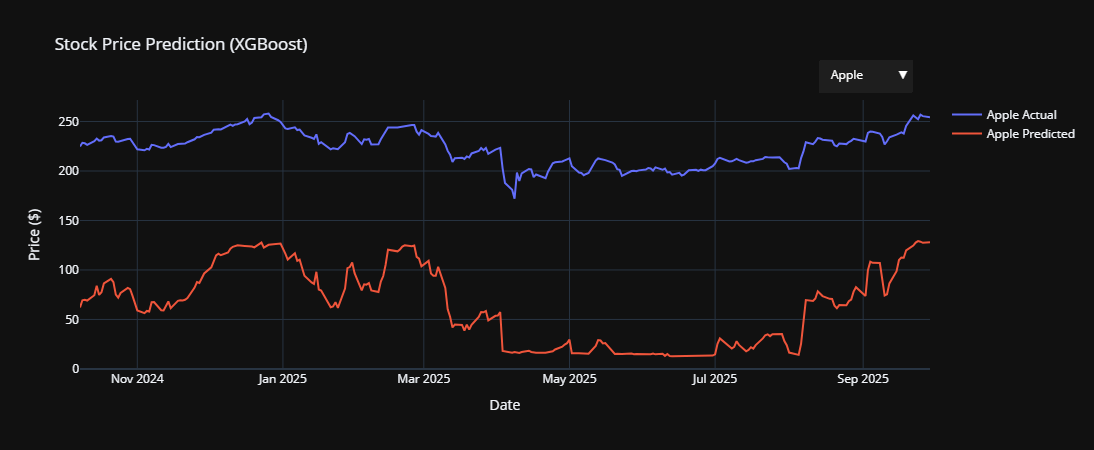

In [55]:
display(Image(filename="plotly_images/predict1.png"))

There is very large variation in the actual and predicted price, let's try to rectify that.

In [53]:
# Notebook: Price Prediction (Regression) - optimized pipeline for 4 companies
# Run as a single cell. Requires: numpy, pandas, sklearn, xgboost, joblib, plotly
# If xgboost isn't installed, the code will still run with RandomForest baseline.

# Improved version with:
# - Log returns as target (more stable)
# - Lag features for Close and indicators
# - Hyperparameter tuning with TimeSeriesSplit
# - Model persistence with joblib
# - Interactive Plotly visualizations

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import plotly.graph_objects as go

# -----------------------
# CONFIG
# -----------------------
COMPANIES = {
    "Apple": df_apple,
    "Nvidia": df_nvidia,
    "Google": df_google,
    "Microsoft": df_microsoft
}

TARGET_HORIZON = 1         # days ahead
LAGS = 5                   # t-1..t-5
TRAIN_FRACTION = 0.8
NLAGS = LAGS
NLAGS_STR = [f"lag{d}" for d in range(1, NLAGS+1)]

BASE_FEATURES = ['Close','High','Low','Open','Volume',
                 'SMA_20','EMA_20','MACD','MACD_Signal','MACD_Diff',
                 'RSI_14','BB_High','BB_Low','ATR','OBV','VWAP']
# We'll create lagged versions of Close and the indicators below.

RANDOM_STATE = 42

# Results containers
reg_summary = []
models_store = {}
preds_store = {}   # for plotting: {company: {'index': idx, 'y_test':, 'y_pred':}}

# -----------------------
# Helper functions
# -----------------------
def make_lag_features(df, cols, nlags):
    """Create lag features t-1..t-nlags for columns in cols."""
    df = df.copy()
    for c in cols:
        for lag in range(1, nlags+1):
            df[f"{c}_lag{lag}"] = df[c].shift(lag)
    return df

def prepare_company_df(df):
    """Prepare features and target. Predict next-day log return and convert back to price later."""
    df = df.copy()
    # ensure datetime index
    if not isinstance(df.index, pd.DatetimeIndex):
        try:
            df.index = pd.to_datetime(df.index)
        except Exception:
            pass

    # compute log price and log returns
    df['log_close'] = np.log(df['Close'])
    df['log_return'] = df['log_close'].diff()         # r_t = ln(P_t) - ln(P_{t-1})
    # target: next-day log return
    df['target_log_return'] = df['log_return'].shift(-TARGET_HORIZON)
    # create lag features for Close and selected indicators
    lag_cols = ['log_return'] + [c for c in BASE_FEATURES if c in df.columns]
    df = make_lag_features(df, lag_cols, NLAGS)
    # drop rows with NaNs from lagging and target
    df.dropna(inplace=True)
    return df

def train_test_split_time(X, y, train_fraction=0.8):
    split_idx = int(len(X)*train_fraction)
    X_train, X_test = X.iloc[:split_idx].copy(), X.iloc[split_idx:].copy()
    y_train, y_test = y.iloc[:split_idx].copy(), y.iloc[split_idx:].copy()
    return X_train, X_test, y_train, y_test

def evaluate_regression(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# -----------------------
# Model definitions and grids
# -----------------------
models_and_grids = {
    "xgb": {
        "pipeline": Pipeline([
            ('scaler', StandardScaler()),
            ('model', XGBRegressor(random_state=RANDOM_STATE, n_jobs=-1, verbosity=0))
        ]),
        "param_grid": {
            'model__n_estimators': [100, 300],
            'model__learning_rate': [0.05, 0.1],
            'model__max_depth': [4, 6],
            'model__subsample': [0.8],
            'model__colsample_bytree': [0.8]
        }
    },
    "rf": {
        "pipeline": Pipeline([
            ('scaler', StandardScaler()),
            ('model', RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1))
        ]),
        "param_grid": {
            'model__n_estimators': [200],
            'model__max_depth': [6, 10],
            'model__min_samples_leaf': [1, 3]
        }
    }
}

# choose models to try (xgb if available + rf)
available_models = []
try:
    _ = XGBRegressor()
    available_models.append("xgb")
except Exception:
    print("XGBoost not available; skipping XGB. Using RandomForest only.")
available_models.append("rf")
# keep order: try XGB first if available
if "xgb" in available_models:
    model_order = ["xgb", "rf"]
else:
    model_order = ["rf"]

# -----------------------
# Main loop per company
# -----------------------
for company_name, df_raw in COMPANIES.items():
    print(f"\n--- Processing {company_name} ---")
    df_p = prepare_company_df(df_raw)

    # features: choose lagged features we created (log_return_lag1..lagN and indicator_lag1..lagN)
    lag_feature_list = []
    # include log_return lags
    lag_feature_list += [f"log_return_lag{lag}" for lag in range(1, NLAGS+1)]
    # include lagged indicators if present
    for feat in BASE_FEATURES:
        if feat in df_p.columns:
            lag_feature_list += [f"{feat}_lag{lag}" for lag in range(1, NLAGS+1)]

    # final X and y (we predict next-day log_return -> later convert to price)
    X = df_p[lag_feature_list].copy()
    y = df_p['target_log_return'].copy()   # log-return target

    # time-based split
    X_train, X_test, y_train, y_test = train_test_split_time(X, y, TRAIN_FRACTION)
    print(f"  rows total: {len(X)}, train: {len(X_train)}, test: {len(X_test)}")

    # TimeSeriesSplit for CV on training set
    n_splits = 5 if len(X_train) > 200 else 3
    tscv = TimeSeriesSplit(n_splits=n_splits)

    best_model = None
    best_score = -np.inf
    best_name = None
    best_cv_results = None

    # grid search (time-series CV) to pick best model
    for mname in model_order:
        info = models_and_grids[mname]
        pipeline = info['pipeline']
        grid = info['param_grid']

        # small GridSearchCV with TimeSeriesSplit
        gs = GridSearchCV(
            estimator=pipeline,
            param_grid=grid,
            cv=tscv,
            scoring='r2',
            n_jobs=-1,
            verbose=0
        )
        try:
            gs.fit(X_train, y_train)
            cv_best = gs.best_score_
            print(f"  {mname} best CV R2: {cv_best:.4f} (params: {gs.best_params_})")
        except Exception as e:
            print(f"  {mname} gridsearch failed: {e}")
            continue

        # pick best on CV
        if cv_best > best_score:
            best_score = cv_best
            best_model = gs.best_estimator_
            best_name = mname
            best_cv_results = gs.cv_results_

    if best_model is None:
        # fall back: fit RF default
        print("  No gridsearch model found — fitting default RandomForest")
        best_model = Pipeline([('scaler', StandardScaler()), ('model', RandomForestRegressor(random_state=RANDOM_STATE))])
        best_model.fit(X_train, y_train)
        best_name = "rf_default"

    # Fit best model on full training set (already fit by GridSearchCV but ensure fit)
    best_model.fit(X_train, y_train)

    # Predict log-returns on test set
    y_test_pred_logret = best_model.predict(X_test)

    # Convert predicted log returns back to predicted price:
    # If we have P_t (the last price in training or current price at time t), we compute P_{t+1} = P_t * exp(pred_log_return)
    # Here we align predicted returns with test indexes: for each test row at index i, the "current price" to multiply is price at same timestamp (Close)
    # Our df_p still has log_close column aligned with X (since we created lags), so use df_p['log_close'].iloc[split_idx ...]
    split_idx = int(len(X) * TRAIN_FRACTION)
    test_index = X_test.index

    # get actual test prices (close at time t+1) for evaluation (we stored target on shifted index)
    # reconstruct predicted price: P_{t+1}_pred = P_t * exp(pred_logret)
    P_t = df_p.loc[test_index, 'Close']      # P_t aligned with X_test rows
    y_pred_price = P_t.values * np.exp(y_test_pred_logret)   # predicted P_{t+1}
    # true next-day price from df_p: it's Close shifted by +1 from P_t => it's stored as P_t * exp(true_log_return)
    # But easiest: true next price is df_p['Close'].shift(-1) at index test_index; we can retrieve target price directly:
    true_next_price = df_p.loc[test_index, 'Close'].shift(-1)
    # however shift(-1) will move index forward; safer: rebuild true next price by P_t * exp(true_log_return)
    true_logret = y_test.values   # y_test is target_log_return
    true_price = P_t.values * np.exp(true_logret)

    # Evaluate predictions on price scale
    mae, rmse, r2 = evaluate_regression(true_price, y_pred_price)
    print(f"  Best model: {best_name} | Test MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

    reg_summary.append({
        "Company": company_name,
        "Model": best_name,
        "CV_R2": best_score,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    })

    # store best model and predictions for plotting
    models_store[company_name] = best_model
    preds_store[company_name] = {
        'index': test_index,
        'y_test_price': true_price,
        'y_pred_price': y_pred_price
    }

    # optionally save model
    # joblib.dump(best_model, f"model_{company_name}_price.pkl")

# -----------------------
# Summary table
# -----------------------
reg_df = pd.DataFrame(reg_summary).set_index('Company')
print("\n=== Regression summary ===")
print(reg_df)

# -----------------------
# Plotly Actual vs Predicted for all 4 companies (dropdown)
# -----------------------
companies_order = ["Apple", "Nvidia", "Google", "Microsoft"]
fig = go.Figure()
for i, cname in enumerate(companies_order):
    if cname not in preds_store:
        continue
    rec = preds_store[cname]
    vis = (i == 0)
    fig.add_trace(go.Scatter(x=rec['index'], y=rec['y_test_price'], mode='lines', name=f"{cname} Actual", visible=vis))
    fig.add_trace(go.Scatter(x=rec['index'], y=rec['y_pred_price'], mode='lines', name=f"{cname} Predicted", visible=vis))

# make dropdown visibility masks
buttons = []
num_traces_per_company = 2
for i, cname in enumerate(companies_order):
    visible = [False] * (num_traces_per_company * len(companies_order))
    visible[i*2:i*2+2] = [True, True]
    buttons.append(dict(label=cname, method='update',
                        args=[{'visible': visible},
                              {'title': f'{cname}: Actual vs Predicted Close Price (Test set)'}]))

fig.update_layout(
    title=f"{companies_order[0]}: Actual vs Predicted Close Price",
    template='plotly_dark',
    updatemenus=[dict(active=0, buttons=buttons, x=0.98, xanchor='right', y=1.12)],
    xaxis_title="Date",
    yaxis_title="Price ($)",
    height=600
)
fig.show()



--- Processing Apple ---
  rows total: 1214, train: 971, test: 243
  xgb best CV R2: -0.2768 (params: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.05, 'model__max_depth': 6, 'model__n_estimators': 100, 'model__subsample': 0.8})
  rf best CV R2: -0.1413 (params: {'model__max_depth': 6, 'model__min_samples_leaf': 3, 'model__n_estimators': 200})
  Best model: rf | Test MAE: 2.9732, RMSE: 4.3366, R2: 0.9373

--- Processing Nvidia ---
  rows total: 1214, train: 971, test: 243
  xgb best CV R2: -0.1176 (params: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 4, 'model__n_estimators': 100, 'model__subsample': 0.8})
  rf best CV R2: -0.0519 (params: {'model__max_depth': 6, 'model__min_samples_leaf': 3, 'model__n_estimators': 200})
  Best model: rf | Test MAE: 4.0188, RMSE: 5.0130, R2: 0.9521

--- Processing Google ---
  rows total: 1214, train: 971, test: 243
  xgb best CV R2: -0.3291 (params: {'model__colsample_bytree': 0.8, 'model__learning_ra

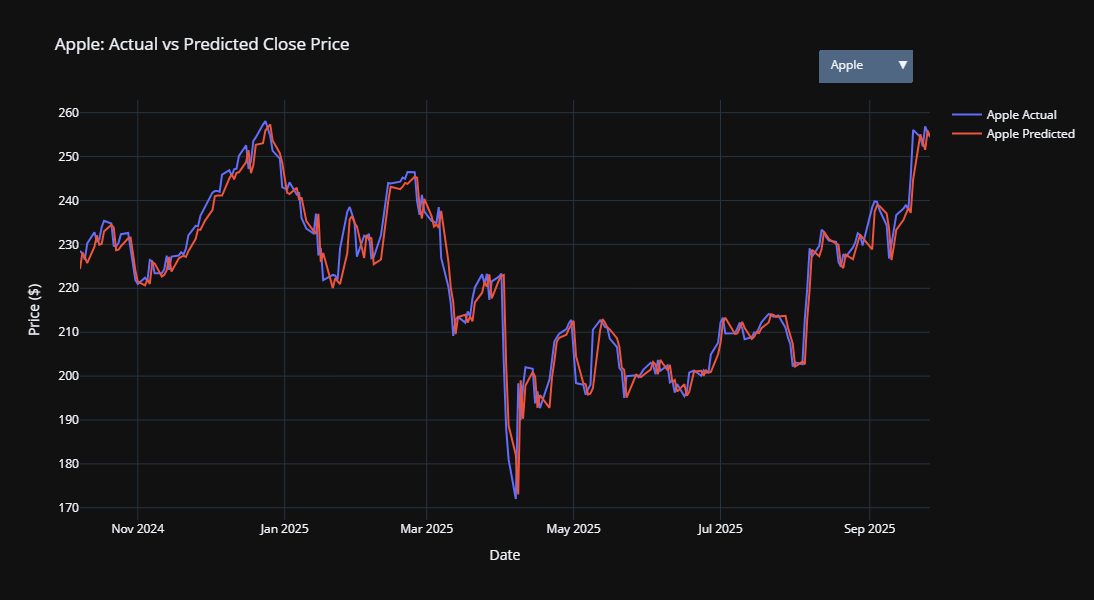

In [56]:
display(Image(filename="plotly_images/predict2.png"))

In [57]:
# Notebook: Direction Classification - optimized pipeline for 4 companies
# Requirements: numpy, pandas, sklearn, xgboost, joblib, plotly

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix
)
import joblib
import plotly.graph_objects as go

# -----------------------
# CONFIG
# -----------------------
COMPANIES = {
    "Apple": df_apple,
    "Nvidia": df_nvidia,
    "Google": df_google,
    "Microsoft": df_microsoft
}

TARGET_HORIZON = 1
LAGS = 5
TRAIN_FRACTION = 0.8
RANDOM_STATE = 42

BASE_FEATURES = ['Close','High','Low','Open','Volume',
                 'SMA','EMA','MACD','MACD_Signal','MACD_Diff',
                 'RSI','BB_High','BB_Low','ATR','OBV','VWAP']

# -----------------------
# Helper functions
# -----------------------
def make_lag_features(df, cols, nlags):
    df = df.copy()
    for c in cols:
        for lag in range(1, nlags+1):
            df[f"{c}_lag{lag}"] = df[c].shift(lag)
    return df

def prepare_company_df(df):
    df = df.copy()
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index, errors='coerce')
    df['log_close'] = np.log(df['Close'])
    df['log_return'] = df['log_close'].diff()
    df['target_direction'] = (df['log_return'].shift(-TARGET_HORIZON) > 0).astype(int)
    df = make_lag_features(df, ['log_return'] + [c for c in BASE_FEATURES if c in df.columns], LAGS)
    df.dropna(inplace=True)
    return df

def train_test_split_time(X, y, frac=0.8):
    split_idx = int(len(X)*frac)
    return X.iloc[:split_idx], X.iloc[split_idx:], y.iloc[:split_idx], y.iloc[split_idx:]

def evaluate_classification(y_true, y_pred, y_prob):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_prob)
    return acc, prec, rec, f1, roc

# -----------------------
# Model definitions and grids
# -----------------------
models_and_grids = {
    "xgb": {
        "pipeline": Pipeline([
            ('scaler', StandardScaler()),
            ('model', XGBClassifier(random_state=RANDOM_STATE, use_label_encoder=False, eval_metric='logloss'))
        ]),
        "param_grid": {
            'model__n_estimators': [200, 400],
            'model__max_depth': [3, 5],
            'model__learning_rate': [0.05, 0.1],
            'model__subsample': [0.8]
        }
    },
    "rf": {
        "pipeline": Pipeline([
            ('scaler', StandardScaler()),
            ('model', RandomForestClassifier(random_state=RANDOM_STATE))
        ]),
        "param_grid": {
            'model__n_estimators': [200, 400],
            'model__max_depth': [6, 10],
            'model__min_samples_leaf': [1, 3]
        }
    }
}

# detect which models available
available_models = []
try:
    _ = XGBClassifier()
    available_models.append("xgb")
except Exception:
    print("XGBoost not available; using RandomForest only.")
available_models.append("rf")

model_order = ["xgb", "rf"] if "xgb" in available_models else ["rf"]

# -----------------------
# Run per company
# -----------------------
cls_summary = []
preds_store = {}

for cname, df_raw in COMPANIES.items():
    print(f"\n--- {cname} ---")
    df_p = prepare_company_df(df_raw)

    # build feature set
    lag_features = []
    for feat in ['log_return'] + [f for f in BASE_FEATURES if f in df_p.columns]:
        lag_features += [f"{feat}_lag{lag}" for lag in range(1, LAGS+1)]
    X = df_p[lag_features].copy()
    y = df_p['target_direction'].copy()

    X_train, X_test, y_train, y_test = train_test_split_time(X, y, TRAIN_FRACTION)
    print(f"  Train size: {len(X_train)}, Test size: {len(X_test)}")

    # time series CV
    tscv = TimeSeriesSplit(n_splits=5 if len(X_train) > 200 else 3)

    best_model, best_score, best_name = None, -np.inf, None

    for mname in model_order:
        info = models_and_grids[mname]
        pipe = info['pipeline']
        grid = info['param_grid']
        gs = GridSearchCV(
            pipe, grid, cv=tscv, scoring='roc_auc', n_jobs=-1, verbose=0
        )
        try:
            gs.fit(X_train, y_train)
            print(f"  {mname} best CV ROC-AUC: {gs.best_score_:.4f}")
            if gs.best_score_ > best_score:
                best_model, best_score, best_name = gs.best_estimator_, gs.best_score_, mname
        except Exception as e:
            print(f"  {mname} failed: {e}")

    if best_model is None:
        print("  Fallback: default RandomForest")
        best_model = Pipeline([('scaler', StandardScaler()), ('model', RandomForestClassifier(random_state=RANDOM_STATE))])
        best_model.fit(X_train, y_train)
        best_name = "rf_default"

    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]

    acc, prec, rec, f1, roc = evaluate_classification(y_test, y_pred, y_prob)
    print(f"  Test → ACC:{acc:.3f}, PREC:{prec:.3f}, REC:{rec:.3f}, F1:{f1:.3f}, ROC:{roc:.3f}")

    cls_summary.append({
        "Company": cname, "Model": best_name,
        "CV_ROC_AUC": best_score, "Accuracy": acc,
        "Precision": prec, "Recall": rec, "F1": f1, "ROC_AUC": roc
    })

    preds_store[cname] = {
        "index": X_test.index,
        "y_true": y_test.values,
        "y_pred": y_pred,
        "y_prob": y_prob
    }

# -----------------------
# Summary
# -----------------------
cls_df = pd.DataFrame(cls_summary).set_index("Company")
print("\n=== Classification Summary ===")
print(cls_df)

# -----------------------
# Interactive Plots: Confusion Matrix + ROC Curve
# -----------------------
companies_order = ["Apple", "Nvidia", "Google", "Microsoft"]
fig = go.Figure()

for i, cname in enumerate(companies_order):
    if cname not in preds_store:
        continue
    rec = preds_store[cname]
    cm = confusion_matrix(rec['y_true'], rec['y_pred'])
    tn, fp, fn, tp = cm.ravel()
    cm_norm = cm / cm.sum()

    visible = (i == 0)
    # confusion matrix heatmap
    fig.add_trace(go.Heatmap(
        z=cm_norm, x=['Pred 0', 'Pred 1'], y=['True 0', 'True 1'],
        visible=visible, colorscale='Viridis', name=f'{cname} CM'
    ))

# Dropdown to switch company
buttons = []
for i, cname in enumerate(companies_order):
    visible = [False]*len(companies_order)
    visible[i] = True
    buttons.append(dict(label=cname, method='update',
                        args=[{'visible': visible},
                              {'title': f'{cname}: Normalized Confusion Matrix'}]))

fig.update_layout(
    title="Stock Direction Classification: Confusion Matrix",
    template="plotly_dark",
    updatemenus=[dict(active=0, buttons=buttons, x=0.98, xanchor='right', y=1.12)],
    height=500
)
fig.show()

# -----------------------
# Optional: save models
# -----------------------
# for cname, model in models_store.items():
#     joblib.dump(model, f"{cname}_direction_model.pkl")



--- Apple ---
  Train size: 972, Test size: 243
  xgb best CV ROC-AUC: 0.5120
  rf best CV ROC-AUC: 0.5219
  Test → ACC:0.481, PREC:0.509, REC:0.453, F1:0.479, ROC:0.502

--- Nvidia ---
  Train size: 972, Test size: 243
  xgb best CV ROC-AUC: 0.5489
  rf best CV ROC-AUC: 0.5303
  Test → ACC:0.560, PREC:0.576, REC:0.695, F1:0.630, ROC:0.575

--- Google ---
  Train size: 972, Test size: 243
  xgb best CV ROC-AUC: 0.5289
  rf best CV ROC-AUC: 0.5129
  Test → ACC:0.527, PREC:0.540, REC:0.817, F1:0.650, ROC:0.576

--- Microsoft ---
  Train size: 972, Test size: 243
  xgb best CV ROC-AUC: 0.5235
  rf best CV ROC-AUC: 0.5433
  Test → ACC:0.527, PREC:0.598, REC:0.452, F1:0.515, ROC:0.521

=== Classification Summary ===
          Model  CV_ROC_AUC  Accuracy  Precision    Recall        F1   ROC_AUC
Company                                                                       
Apple        rf    0.521949  0.481481   0.508772  0.453125  0.479339  0.501630
Nvidia      xgb    0.548914  0.559671   0